Saulo Gabriel López Antonio

Proyecto Data Analyst

Impacto de Covid en la banca mexicana


Fuentes: 
http://portafoliodeinformacion.cnbv.gob.mx/Paginas/defaultGOBMX.aspx
Reportes: 040-4A-R13 | 040_30a_R25 | 040_33a_R25 | 040_31A_R25

https://www.gob.mx/salud/documentos/datos-abiertos-152127 "Casos Covid"

https://datos.covid-19.conacyt.mx/#DownZCSV "Casos covid por municipio y población por municipio"

https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463776079 "Mapas de México"

Ahora corresponde instalar las librerias que van ha utilizar en este pryecto

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
#sns.set_style('white')
%matplotlib inline
import seaborn as sns
#sns.set_style('whitegrid')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
plt.style.use('seaborn-darkgrid')


Lo primero es tratar de encontrar si hubo algun cambio en el comportamiento de la captación y la cartera a nivel nacional, en el periodo que dio inicio el covid en México, por lo que habría que cargar la siguiente información que se obtuvo de la CNBV
Hay que tener en cuenta que esta informaicón solo se actualiza cada mes para captación y de forma bimestral para la cartera, a la fecha de este proyecto solo hay información hasta agosto dle 20 en cartera y septiembre del 2020 de captación

In [3]:
#Lectura de la tabla captación
captacion = pd.read_csv('CAPTACION.csv')
captacion.head()

,ID,cve_periodo,cve_institucion,cve_municipio,cve_estado,Banco,Municipio,Estado,Año,Mes,Fecha,Nomina,Transaccionales,Plazo,Total
0,1,201712,40002,1001,1,Banamex,AGUASCALIENTES,AGUASCALIENTES,2017,12,31/12/2017,610977112,4.215722e+09,7.366347e+08,5.563334e+09
1,2,201712,40012,1001,1,BBVA Bancomer,AGUASCALIENTES,AGUASCALIENTES,2017,12,31/12/2017,1508014715,6.631199e+09,2.172680e+09,1.031189e+10
2,3,201712,40014,1001,1,Santander,AGUASCALIENTES,AGUASCALIENTES,2017,12,31/12/2017,218614927,2.715020e+09,7.036781e+08,3.637313e+09
3,4,201712,40021,1001,1,HSBC,AGUASCALIENTES,AGUASCALIENTES,2017,12,31/12/2017,181116695,1.673254e+09,1.141389e+09,2.995760e+09
4,5,201712,40030,1001,1,Banco del Bajío,AGUASCALIENTES,AGUASCALIENTES,2017,12,31/12/2017,25549036,7.386944e+08,2.093657e+09,2.857900e+09


In [4]:
#Lectura de la tabla cartera
cartera = pd.read_csv('CARTERA.csv')
cartera.head()

,ID,cve_periodo,cve_estado,cve_municipio,cve_institucion,Fecha,Estado,Municipio,Banco,Automotriz,Consumo,Nomina,Cartera
0,1,201802,1,1001,40002,28/02/2018,AGUASCALIENTES,Aguascalientes,Banamex,510170,438907357,349633632,789051159
1,2,201802,1,1001,40012,28/02/2018,AGUASCALIENTES,Aguascalientes,BBVA Bancomer,308772624,288422134,644512458,1241707215
2,3,201802,1,1001,40014,28/02/2018,AGUASCALIENTES,Aguascalientes,Santander,0,1447887,111198769,112646656
3,4,201802,1,1001,40021,28/02/2018,AGUASCALIENTES,Aguascalientes,HSBC,71585385,123839295,121755448,317180128
4,5,201802,1,1001,40030,28/02/2018,AGUASCALIENTES,Aguascalientes,Banco del Bajío,8907732,1311593,7872806,18092131


Una vez teniendo las 2 bases cargadas, habria que dejar los datos de tal forma que puedan expresar la información historica por los productos de captación y de cartera, para poder hacer gráficas de series de tiempo


In [780]:
#Construcción de tabla agrupada por periodo de captación
Total_Banca= captacion.groupby(["cve_periodo","Fecha"],as_index=False).sum()
Total_Banca["Transaccionales"]=round(Total_Banca["Transaccionales"]/1000000000,2)
Total_Banca["Nomina"]=round(Total_Banca["Nomina"]/1000000000,2)
Total_Banca["Plazo"]=round(Total_Banca["Plazo"]/1000000000,2)
Total_Banca["Total"]=round(Total_Banca["Total"]/1000000000,2)
Total_Banca["Fecha"] = pd.to_datetime(Total_Banca["Fecha"])
Total_Bancaf=Total_Banca[["Fecha","Total"]]
Total_Bancaf.set_index('Fecha', inplace=True)
Total_Bancaf2=Total_Banca[["Fecha","Nomina","Transaccionales","Plazo","Total"]]
Total_Bancaf2.set_index('Fecha', inplace=True)
Total_Bancaf2.head()

,Nomina,Transaccionales,Plazo,Total
Fecha,,,,
2016-12-31,321.10,2902.09,1272.33,4495.52
2017-01-31,299.49,2871.48,1284.49,4455.46
2017-02-28,291.30,2877.54,1318.61,4487.45
2017-03-31,309.09,2893.18,1319.40,4521.68
2017-04-30,313.97,2932.71,1396.77,4643.45


In [782]:
#Construcción de tabla agrupada por periodo de cartera
Total_Banca_cartera= cartera.groupby(["cve_periodo","Fecha"],as_index=False).sum()
Total_Banca_cartera["Automotriz"]=round(Total_Banca_cartera["Automotriz"]/1000000000,2)
Total_Banca_cartera["Consumo"]=round(Total_Banca_cartera["Consumo"]/1000000000,2)
Total_Banca_cartera["Nomina"]=round(Total_Banca_cartera["Nomina"]/1000000000,2)
Total_Banca_cartera["Cartera"]=round(Total_Banca_cartera["Cartera"]/1000000000,2)
Total_Banca_cartera["Fecha"] = pd.to_datetime(Total_Banca_cartera["Fecha"])
Total_Banca_cartera2=Total_Banca_cartera[["Fecha","Automotriz","Consumo","Nomina","Cartera"]]
Total_Banca_cartera2.set_index('Fecha', inplace=True)
Total_Banca_cartera2.head()

,Automotriz,Consumo,Nomina,Cartera
Fecha,,,,
2016-02-29,73.63,127.23,195.86,396.71
2016-04-30,74.82,130.17,204.12,409.12
2016-06-30,76.49,135.91,212.69,425.10
2016-08-31,78.82,140.76,217.16,436.74
2016-10-31,81.14,144.57,220.68,446.38


Ya teniendo esta dos data frame se pueden hacer gráficas que muestren la tendencia que se ha tenido de manera histórica

<AxesSubplot:xlabel='Fecha'>

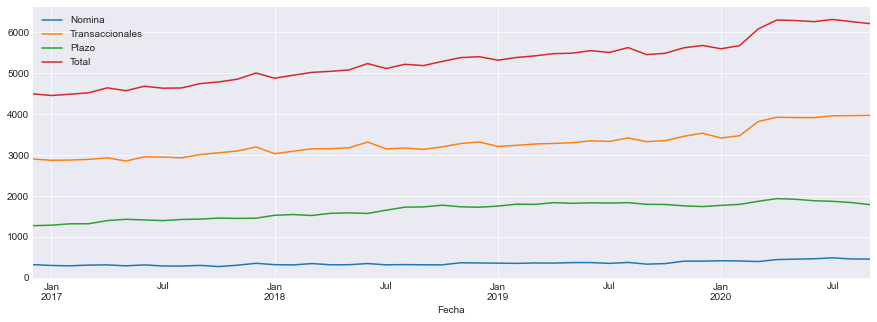

In [11]:
Total_Bancaf2.plot(grid=True, figsize=(15,5))

<AxesSubplot:xlabel='Fecha'>

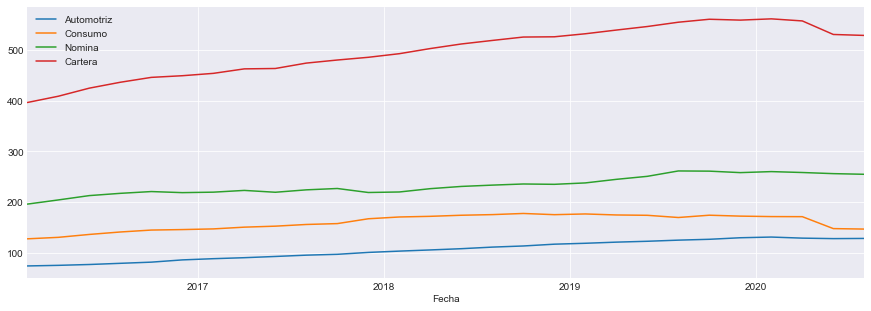

In [16]:
Total_Banca_cartera2.plot(grid=True, figsize=(15,5))

Con esto podemos ver que tanto la cartera como la captación tenian un tendencia creciente, pero en el 2020 suceden cambios en el comportamiento de estos, por lo que vamos generar las series de tiempo que han tenido cada producto, tanto por tipo como en conjunto para saber si realmente cambio su tendencia

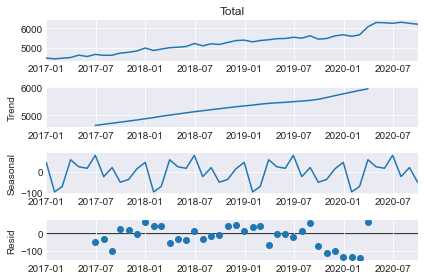

In [766]:
#Se descompone los elementos de la serie de tiempo para detectar si hubo un cambio en la tendencia o en la ciclicidad
decomposeT = seasonal_decompose(Total_Bancaf2['Total'])
f=decomposeT.plot()

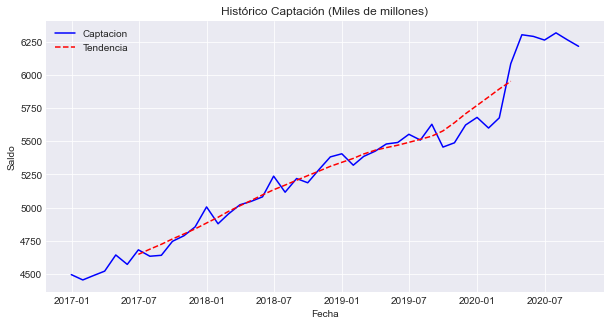

In [771]:
#Grafica del total de captación 
plt.figure(figsize=(10,5))
plt.plot(Total_Bancaf2.index, Total_Bancaf2['Total'],label="Captacion", c='blue')
plt.plot(Total_Bancaf2.index, decomposeT.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Captación (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Saldo")
#plt.savefig('grafica.png')

Se observa que justamente hay un cambio en la tendencia que se tenia del total de captación, ya que el comportamiento cíclico se mantiene pero hay un punto de inflexión justamente en el periodo que dio inicio la contingencia por covid, esto ocasiono un crecimiento anormal, ya que en dos meses subió $600 mil millones de pesos, lo cual es casi el mismo incremento que se ha tenido en 18 meses (mayo-18 a nov-19)

Ahora procedemos a evaluar el comportamiento de captación de nómina

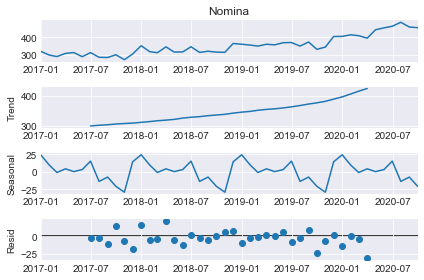

In [778]:
decomposeN = seasonal_decompose(Total_Bancaf2['Nomina'])
f=decomposeN.plot()

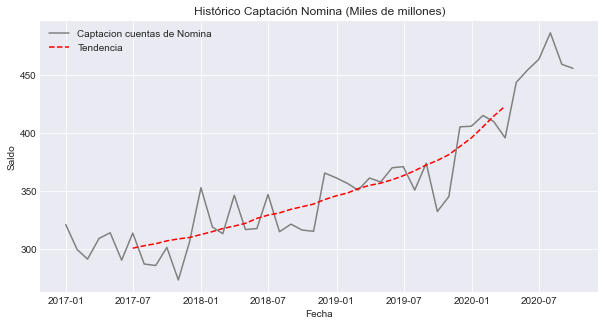

In [785]:
# Gráfica del producto de nómina
plt.figure(figsize=(10,5))
plt.plot(Total_Bancaf2.index, Total_Bancaf2['Nomina'],label="Captacion cuentas de Nomina", c='gray')
plt.plot(Total_Bancaf2.index, decomposeN.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Captación Nomina (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Saldo")
#plt.savefig('grafica.png')

En este producto ya venia con un cambio en su tendencia en julio del 19, pero durante el 2020 esta tendencia se ha mantenido e incluso bajo en los meses de julio y agosto del 2020

Continuamos con la evaluación del producto de cuentas transaccionales de captación (N4)

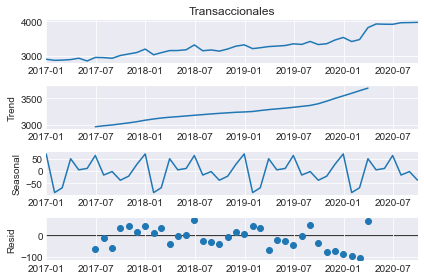

In [12]:
decomposeTA = seasonal_decompose(Total_Bancaf2['Transaccionales'])
f=decomposeTA.plot()

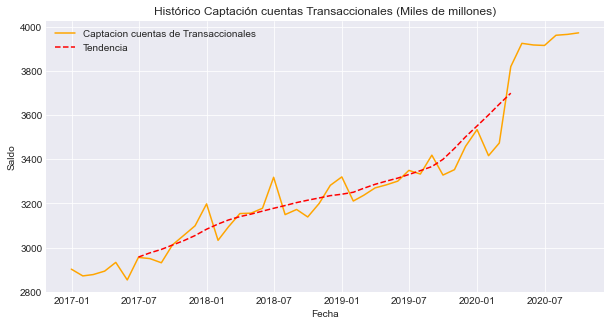

In [786]:
plt.figure(figsize=(10,5))
plt.plot(Total_Bancaf2.index, Total_Bancaf2['Transaccionales'],label="Captacion cuentas de Transaccionales", c='orange')
plt.plot(Total_Bancaf2.index, decomposeTA.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Captación cuentas Transaccionales (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Saldo")
plt.savefig('grafica.png')

Este producto tiene un crecimiento aun más pronunciado, siendo el crecimiento que se tuvo en más de dos años (sep-17 a ene-20)
en tan solo 2 meses, esto en principio nos habla que las personas prefirieron tener más dinero en sus cuentas, es decir 
incrementar sus ahorro ante lo que pudiera pasar en los meses siguientes

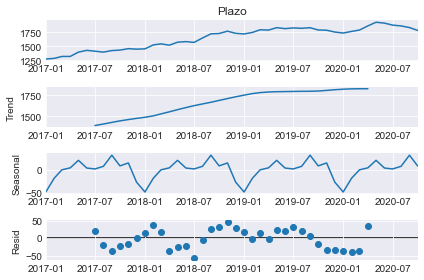

In [9]:
decomposeP = seasonal_decompose(Total_Bancaf2['Plazo'])
f=decomposeP.plot()

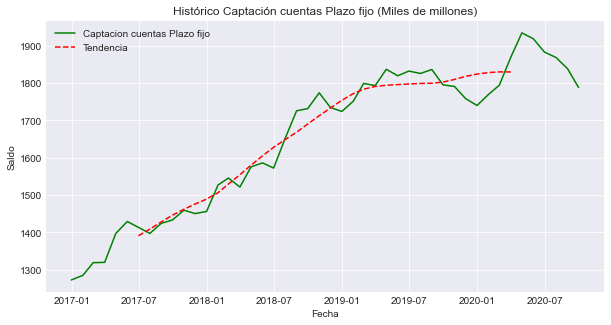

In [787]:
plt.figure(figsize=(10,5))
plt.plot(Total_Bancaf2.index, Total_Bancaf2['Plazo'],label="Captacion cuentas Plazo fijo", c='green')
plt.plot(Total_Bancaf2.index, decomposeP.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Captación cuentas Plazo fijo (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Saldo")
plt.savefig('grafica.png')

Por último en el caso de inversiones se observa que tuvo un incremento pero en los meses subsecuentes empezó a tener una caída, esto nos dice que en un principio estaba dispuesta a tener sus ahorros en fondos de largo plazo pero ante el covid 
empezaron a incrementar sus ahorros en productos más líquidos

Dado los resultados anteriores, pareciera que los productos de captación que tuvieron un mayor cambio en su tendencia son el de nómina y 
principalmente las  cuentas transaccionales, lo que a nivel general si hay más dinero en las cuentas de ahorro pero principalmente como dinero líquido

Ahora habría que medir el impacto en la cartera de crédito

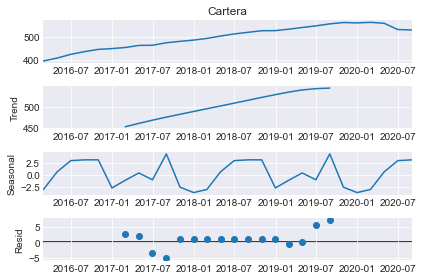

In [15]:
decomposeC = seasonal_decompose(Total_Banca_cartera2['Cartera'])
f=decomposeC.plot()

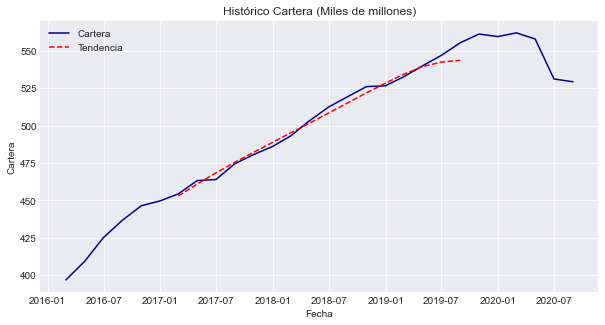

In [774]:
# Gráfica de la cartera de crédito
plt.figure(figsize=(10,5))
plt.plot(Total_Banca_cartera2.index, Total_Banca_cartera2['Cartera'],label="Cartera", c='darkblue')
plt.plot(Total_Banca_cartera2.index, decomposeC.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Cartera (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Cartera")
plt.savefig('grafica.png')

Aqui podemos notar que la cartera mantenía una tendencia creciente durante 2017 al 2019, pero justo cuando sucedió la alerta sanitaria del 
covid la cartera bancaria empezo a caer, que en este caso es casi todo el crecimiento que se tuvo durante el 2019

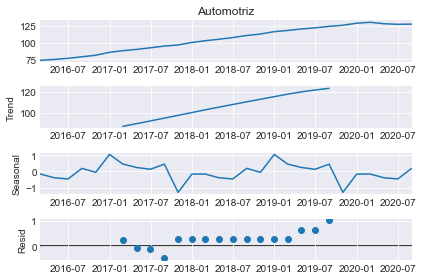

In [18]:
decomposeAT = seasonal_decompose(Total_Banca_cartera2['Automotriz'])
f=decomposeAT.plot()

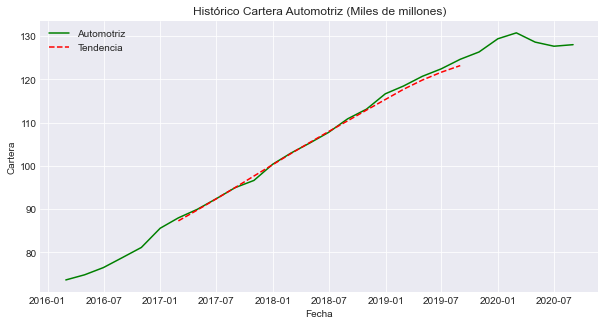

In [788]:
#Grafica de la cartera automotriz
plt.figure(figsize=(10,5))
plt.plot(Total_Banca_cartera2.index, Total_Banca_cartera2['Automotriz'],label="Automotriz", c='Green')
plt.plot(Total_Banca_cartera2.index, decomposeAT.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Cartera Automotriz (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Cartera")
plt.savefig('grafica.png')

En el caso de la cartera automotriz tenia un crecimiento constante, pero en el momento de covid dejo de crecer y se mantenido casi constante
desde entonces


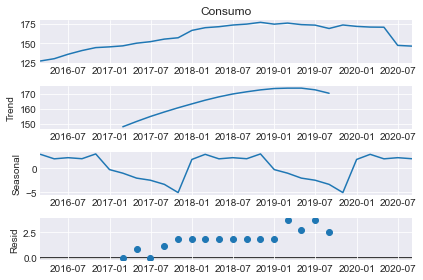

In [790]:
decomposeCS = seasonal_decompose(Total_Banca_cartera2['Consumo'])
f=decomposeCS.plot()

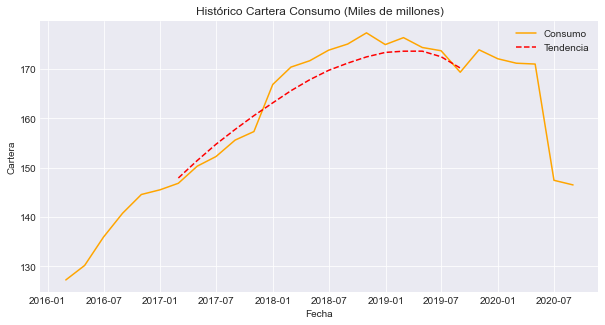

In [791]:
#gráfica de consumo
plt.figure(figsize=(10,5))
plt.plot(Total_Banca_cartera2.index, Total_Banca_cartera2['Consumo'],label="Consumo", c='Orange')
plt.plot(Total_Banca_cartera2.index, decomposeCS.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Cartera Consumo (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Cartera")
plt.savefig('grafica.png')

Para la cartera de consumo, se observa un desplome total, cayendo casi 30 mil millones de pesos, 
siendo el crecimiento que se tuvo desde agosto-16 hasta enero-20

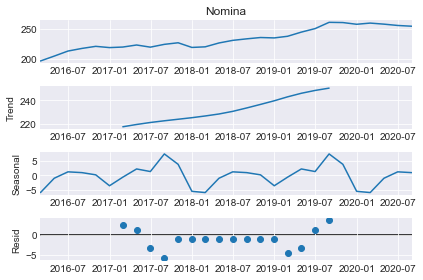

In [792]:
decomposeCN = seasonal_decompose(Total_Banca_cartera2['Nomina'])
f=decomposeCN.plot()

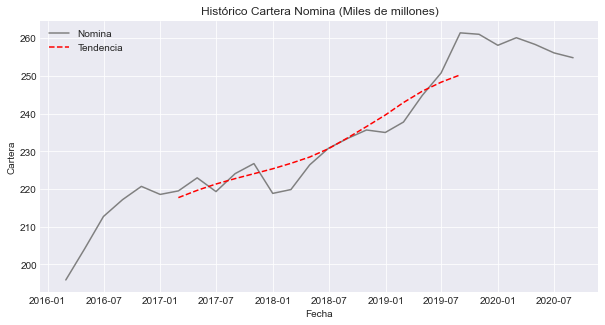

In [793]:
#Gráfica de Nómina
plt.figure(figsize=(10,5))
plt.plot(Total_Banca_cartera2.index, Total_Banca_cartera2['Nomina'],label="Nomina", c='Gray')
plt.plot(Total_Banca_cartera2.index, decomposeCN.trend ,marker='',label="Tendencia", linestyle='--',c='red')
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.legend()
plt.title('Histórico Cartera Nomina (Miles de millones)')
plt.xlabel("Fecha")
plt.ylabel("Cartera")
plt.savefig('grafica.png')

La cartera de nómina tenía un crecimiento constante pero desde julio del 19 a enero del 20 había presentado ya una desaceleración,
pero en el período del covid empezó a tener una caída más pronunciada 


Como se ha podido apreciar la parte de cartera ha tenido el efecto inverso que en la captación presentando una tendencia hacia la baja, 
principalmente la cartera de consumo que es la que tuvo la peor caída, esto nos habla de que las personas empezaron a disminuir los préstamos que solicitaban posiblemente para no tener alguna deuda en este periodo de incertidumbre por el covid

Ya vimos el comportamiento general, ahora toca ver el comportamiento de los bancos, 
por lo cual es necesario obtener data frames agrupados por institución y por los productos de captación y de cartera

In [23]:
#Construcción de tabla agrupada por institución
Banco_captacion= captacion.groupby(["cve_institucion","Banco","cve_periodo","Fecha"],as_index=False).sum()
Banco_captacion["Transaccionales"]=round(Banco_captacion["Transaccionales"]/1000000000,2)
Banco_captacion["Nomina"]=round(Banco_captacion["Nomina"]/1000000000,2)
Banco_captacion["Plazo"]=round(Banco_captacion["Plazo"]/1000000000,2)
Banco_captacion["Total"]=round(Banco_captacion["Total"]/1000000000,2)
Banco_captacion["Fecha"] = pd.to_datetime(Banco_captacion["Fecha"])
Banco_captacion.head()

,cve_institucion,Banco,cve_periodo,Fecha,ID,cve_municipio,cve_estado,Año,Mes,Nomina,Transaccionales,Plazo,Total
0,40002,Banamex,201612,2016-12-31,769783856,46820496,46563,4876704,29028,56.39,545.41,148.23,750.03
1,40002,Banamex,201701,2017-01-31,754269813,46860745,46603,4883157,2421,50.97,533.46,151.40,735.83
2,40002,Banamex,201702,2017-02-28,736981011,46798936,46542,4877106,4836,49.84,551.63,156.27,757.75
3,40002,Banamex,201703,2017-03-31,719633775,46738318,46482,4871055,7245,54.21,536.84,158.75,749.80
4,40002,Banamex,201704,2017-04-30,704589050,46839335,46582,4881140,9680,55.76,533.32,166.41,755.48


Ya tenemos una tabla general por institución pero vamos a generar tambien un data frame con la variación que tuvieron durante el periodo 
de covid que seria de febero 2020 hasta agosto 2020 

In [24]:
Total_captacion_Banco = Banco_captacion.pivot_table(values='Total', index=['cve_institucion','Banco'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Total_captacion_Banco= Total_captacion_Banco.reset_index().rename_axis(None, axis=1)
Total_captacion_Banco=Total_captacion_Banco[['cve_institucion','Banco',202002,202009]]
Total_captacion_Banco=Total_captacion_Banco.rename(columns={202002:'CaptacionFeb20', 202009: 'CaptacionSep20'})
Total_captacion_Banco['CrecCaptacion2020']=Total_captacion_Banco['CaptacionSep20']-Total_captacion_Banco['CaptacionFeb20']
Total_captacion_Banco['VarCaptacion2020']=((Total_captacion_Banco['CaptacionSep20']/Total_captacion_Banco['CaptacionFeb20'])-1)*100
#Data frame con los bancos que más salo tienen
Total_captacion_Banco_top10=Total_captacion_Banco.sort_values(by='CaptacionFeb20', ascending=False).head(10).reset_index().drop(columns=['index'])
#Data frame con los bancos que más crecieron
Total_captacion_Banco_top10C=Total_captacion_Banco.sort_values(by='CrecCaptacion2020', ascending=False).head(10).reset_index().drop(columns=['index'])
#Data frame con los bancos que menos crecieron en %
Total_captacion_Banco_top10V=Total_captacion_Banco.sort_values(by='VarCaptacion2020', ascending=False).head(10).reset_index().drop(columns=['index'])
Total_captacion_Banco2= Total_captacion_Banco.dropna()
#Data frame con los bancos que menos salo tienen
Total_captacion_Banco_bottom10=Total_captacion_Banco2.sort_values(by='CaptacionFeb20', ascending=True).head(10).reset_index().drop(columns=['index'])
#Data frame con los bancos que menos crecieron
Total_captacion_Banco_bottomC=Total_captacion_Banco2.sort_values(by='CrecCaptacion2020', ascending=True).head(10).reset_index().drop(columns=['index'])
#Data frame con los bancos que menos crecieron en %
Total_captacion_Banco_bottomV=Total_captacion_Banco2.sort_values(by='VarCaptacion2020', ascending=True).head(10).reset_index().drop(columns=['index'])
Total_captacion_Banco_top10C

,cve_institucion,Banco,CaptacionFeb20,CaptacionSep20,CrecCaptacion2020,VarCaptacion2020
0,40012,BBVA Bancomer,1306.46,1481.60,175.14,13.405692
1,40002,Banamex,841.28,995.49,154.21,18.330401
2,40014,Santander,746.10,831.43,85.33,11.436805
3,40072,Banorte,795.73,865.78,70.05,8.803237
4,40044,Scotiabank,352.08,379.00,26.92,7.645990
5,40030,Banco del Bajío,150.68,173.23,22.55,14.965490
6,40127,Banco Azteca,157.57,172.59,15.02,9.532271
7,40137,BanCoppel,64.83,78.60,13.77,21.240167
8,40021,HSBC,454.93,466.21,11.28,2.479502
9,40110,J.P. Morgan,16.76,25.77,9.01,53.758950


Primero vamos a ver como es la concentración de la captación en febrero del 2020

Text(0.5, 1.0, 'Captación Febrero 2020 (Miles de millones)')

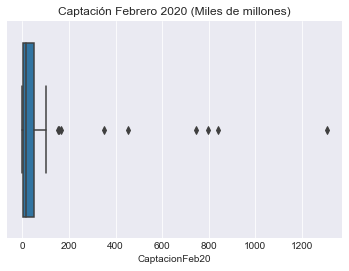

In [795]:
ax=sns.boxplot(x=Total_captacion_Banco['CaptacionFeb20']);
ax.set_title('Captación Febrero 2020 (Miles de millones)')


Esto nos muestra que hay instituciones que concentran la mayor parte de la captación y que el resto no es tan representativo

Veamos cuales son las instituciones que concentran la mayor parte de la captación, con los data frame que creamos con anterioridad

Text(0.5, 1.0, 'Captación (MM) top 10')

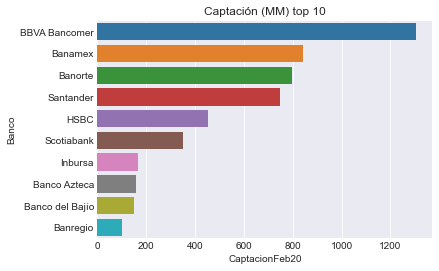

In [796]:
ax = sns.barplot(x=Total_captacion_Banco_top10['CaptacionFeb20'], y=Total_captacion_Banco_top10['Banco'])
ax.set_title('Captación (MM) top 10')


Aqui podemos detectar el top 10 de bancos con captación en febrero, si hacemos ahora una gráfica con los bancos que tuvieron el mayor crecimiento de captación podemos ver que varios se repiten en ambas gráficas

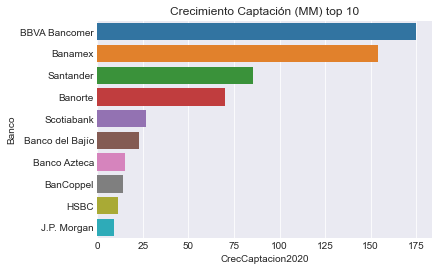

In [797]:
ax = sns.barplot(x=Total_captacion_Banco_top10C['CrecCaptacion2020'], y=Total_captacion_Banco_top10C['Banco'])
ax.set_title('Crecimiento Captación (MM) top 10')
plt.savefig('grafica.png')

Al menos 7 de los top bancos son los que tuvieron el mayor crecimiento de captación, lo cual hace sentido dada la alta concentración que estos
tenían

<AxesSubplot:xlabel='Fecha'>

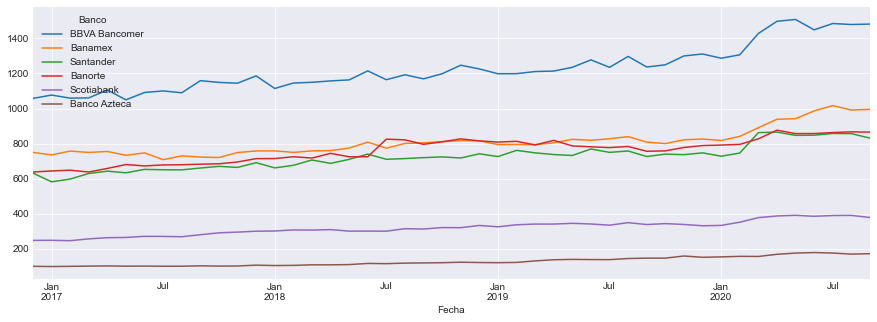

In [40]:
#Gráfica de captación historica por institución 
Total_Banca_bancos= captacion.groupby(["cve_periodo","Fecha","Banco"],as_index=False).sum()
Total_Banca_bancos["Total"]=round(Total_Banca_bancos["Total"]/1000000000,2)
Total_Banca_bancos["Fecha"] = pd.to_datetime(Total_Banca_bancos["Fecha"])
Total_Banca_bancos=Total_Banca_bancos[["Fecha","Total","Banco"]]
Total_Banca_bancos = Total_Banca_bancos.pivot_table(values='Total', index=["Fecha"], columns=["Banco"], aggfunc='sum',fill_value=0)
Total_Banca_bancostop10 = Total_Banca_bancos[["BBVA Bancomer","Banamex","Santander","Banorte","Scotiabank","Banco Azteca"]]
Total_Banca_bottomtop10  = Total_Banca_bancos[["CIBanco","Multiva","Banregio"]]
Total_Banca_bancostop10.plot(grid=True, figsize=(15,5))

Podemos ver que la mayoria de los top bancos tuvieron un incremento de la captación en el periodo de covid, 
por que los que teniás más captación del mercado fueron los que subieron más en este periodo.

Ahora graficaremos los bancos que tuvieron el menor crecimiento

Text(0.5, 1.0, 'Crecimiento Captación (MM) Bottom 10')

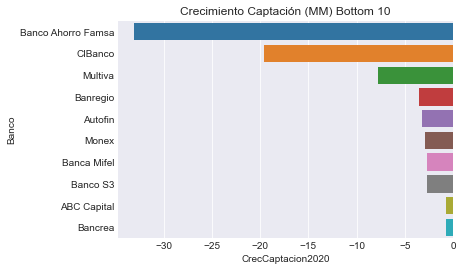

In [798]:
ax = sns.barplot(x=Total_captacion_Banco_bottomC['CrecCaptacion2020'], y=Total_captacion_Banco_bottomC['Banco'])
ax.set_title('Crecimiento Captación (MM) Bottom 10')

Podemos ver que el banco más afectado ha sido Banco Famsa, auqnue esto sucedio en periodo de covid, sabemos que 
por las irregularidades que tenía se le suspendio la licencia de banco, por lo que es normal ver esa caída, de ahi 
los siguientes más afectados han sido Multiva, CIBanco y Banregio

<AxesSubplot:xlabel='Fecha'>

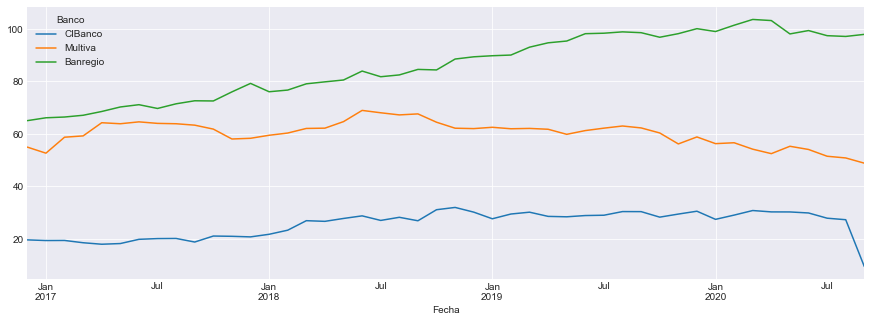

In [41]:
Total_Banca_bottomtop10 .plot(grid=True, figsize=(15,5))

Al ver sus tendencias vemos claramente que CiBanco es el más afectado por covid,  ya que tuvo una alta salida de los recursos,  en el caso de Multiva ya venía con una tendencia a la baja por lo que es algo que ya se estaba presentado y por último Banregio si tuvo un impacto por covid ya que cambio su comportmaiento justamente en el momento que dío inicio la contingencia 

Ahora veamos que impacto hubo en la cartera de crédito por institución, por lo que al igual que la captación se hara un data frame que de esta información por institución

In [45]:
#Construcción de tabla agrupada por institución por cartera
Banco_cartera= cartera.groupby(["cve_institucion","Banco","cve_periodo","Fecha"],as_index=False).sum()
Banco_cartera["Automotriz"]=round(Banco_cartera["Automotriz"]/1000000000,2)
Banco_cartera["Nomina"]=round(Banco_cartera["Nomina"]/1000000000,2)
Banco_cartera["Consumo"]=round(Banco_cartera["Consumo"]/1000000000,2)
Banco_cartera["Cartera"]=round(Banco_cartera["Cartera"]/1000000000,2)
Banco_cartera["Fecha"] = pd.to_datetime(Banco_cartera["Fecha"])
Banco_cartera.head()

,cve_institucion,Banco,cve_periodo,Fecha,ID,cve_estado,cve_municipio,Automotriz,Consumo,Nomina,Cartera
0,40002,Banamex,201602,2016-02-29,1072082708,44652,44887080,0.26,37.85,45.84,83.95
1,40002,Banamex,201604,2016-04-30,1134800996,44707,44942204,0.25,37.94,48.01,86.19
2,40002,Banamex,201606,2016-06-30,1197105293,44708,44943165,0.23,38.82,51.80,90.85
3,40002,Banamex,201608,2016-08-31,1257034264,44652,44885994,0.22,39.13,52.99,92.35
4,40002,Banamex,201610,2016-10-31,1320394237,44662,44896477,0.19,38.74,53.51,92.44


Ahora sacaremos los cambios que tuvieron en le periodo del covid

In [71]:
Banco_cartera_Banco = Banco_cartera.pivot_table(values='Cartera', index=['cve_institucion','Banco'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Banco_cartera_Banco= Banco_cartera_Banco.reset_index().rename_axis(None, axis=1)
Banco_cartera_Banco=Banco_cartera_Banco[['cve_institucion','Banco',202002,202008]]
Banco_cartera_Banco=Banco_cartera_Banco.rename(columns={202002:'CarteraFeb20', 202008: 'CarteraAgo20'})
Banco_cartera_Banco['CrecCartera2020']=Banco_cartera_Banco['CarteraAgo20']-Banco_cartera_Banco['CarteraFeb20']
Banco_cartera_Banco['VarCartera2020']=((Banco_cartera_Banco['CarteraAgo20']/Banco_cartera_Banco['CarteraFeb20'])-1)*100
#Bancos con mayor concentración de cartera
Banco_cartera_Banco_top10=Banco_cartera_Banco.sort_values(by='CarteraFeb20', ascending=False).head(10).reset_index().drop(columns=['index'])
#Bancos con mayor crecimiento de cartera
Banco_cartera_Banco_top10C=Banco_cartera_Banco.sort_values(by='CrecCartera2020', ascending=False).head(10).reset_index().drop(columns=['index'])
#Bancos con mayor crecimiento de cartera en %
Banco_cartera_Banco_top10V=Banco_cartera_Banco.sort_values(by='VarCartera2020', ascending=False).head(10).reset_index().drop(columns=['index'])
Banco_cartera_Banco2= Banco_cartera_Banco.dropna()
#Bancos con mayor concentración de cartera
Banco_cartera_Banco_bottom10=Banco_cartera_Banco2.sort_values(by='CarteraFeb20', ascending=True).head(10).reset_index().drop(columns=['index'])
#Bancos con menor crecimiento de cartera
Banco_cartera_Banco_bottom10C=Banco_cartera_Banco2.sort_values(by='CrecCartera2020', ascending=True).head(10).reset_index().drop(columns=['index'])
#Bancos con menor crecimiento de cartera en %
Banco_cartera_Banco_bottom10V=Banco_cartera_Banco2.sort_values(by='VarCartera2020', ascending=True).head(10).reset_index().drop(columns=['index'])
Banco_cartera_Banco.head()

,cve_institucion,Banco,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020
0,40002,Banamex,85.42,76.74,-8.68,-10.161555
1,40012,BBVA Bancomer,194.39,188.83,-5.56,-2.860229
2,40014,Santander,36.71,37.13,0.42,1.144102
3,40021,HSBC,42.77,39.49,-3.28,-7.668927
4,40030,Banco del Bajío,1.58,1.62,0.04,2.531646


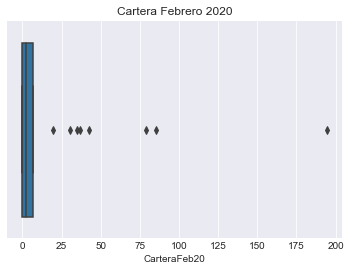

In [799]:
ax=sns.boxplot(x=Banco_cartera_Banco['CarteraFeb20']);
ax.set_title('Cartera Febrero 2020')
plt.savefig('grafica.png')

De igual forma que la captación vemos hay algunos bancos que tienen una concentración muy elevada de la cartera, por lo que seria cuestión de ver el comportamiento de los que concentran la mayor parte de esta

Primero calculamos la cartera que hay por institución al cierre de febrero del 2020 y cuales bancos son el top 10

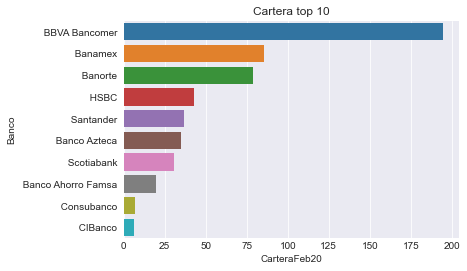

In [800]:
ax = sns.barplot(x=Banco_cartera_Banco_top10['CarteraFeb20'], y=Banco_cartera_Banco_top10['Banco'])
ax.set_title('Cartera top 10')
plt.savefig('grafica.png')

Como vimos que la cartera bajo a nivel nacional, primero detectemos los bancos que se vieron más afectados en este periodo

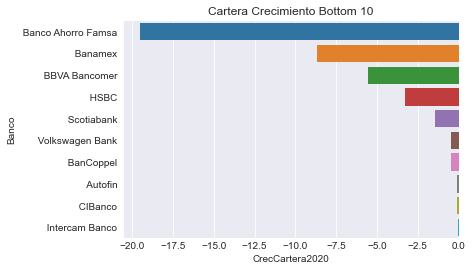

In [801]:
ax = sns.barplot(x=Banco_cartera_Banco_bottom10C['CrecCartera2020'], y=Banco_cartera_Banco_bottom10C['Banco'])
ax.set_title('Cartera Crecimiento Bottom 10')
plt.savefig('grafica.png')

Los bancos que tenían más cartera, son los que tuvieron la mayor caída de esta, que destaca nuevamente Famsa por el quiebre que tuvo

Ahora veamos que bancos crecieron más su cartera

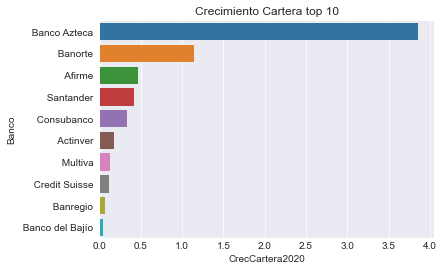

In [802]:
ax = sns.barplot(x=Banco_cartera_Banco_top10C['CrecCartera2020'], y=Banco_cartera_Banco_top10C['Banco'])
ax.set_title('Crecimiento Cartera top 10')
plt.savefig('grafica.png')

En este caso vemos que Banco Azteca y Banorte fueron los que tuvieron el mayor crecimiento, curiosamente estos son miembros del top 10

<AxesSubplot:xlabel='Fecha'>

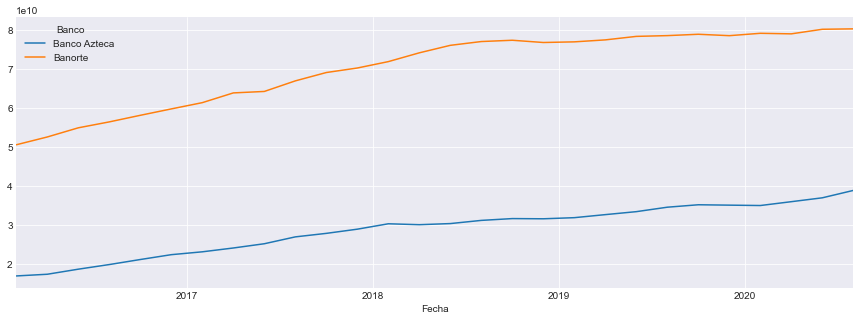

In [62]:
Total_Cartera_bancos= cartera.groupby(["cve_periodo","Fecha","Banco"],as_index=False).sum()
Total_Cartera_bancos["Total"]=round(Total_Cartera_bancos['Cartera']/1000000000,2)
Total_Cartera_bancos["Fecha"] = pd.to_datetime(Total_Cartera_bancos["Fecha"])
Total_Cartera_bancos=Total_Cartera_bancos[["Fecha",'Cartera',"Banco"]]
Total_Cartera_bancos['Banco'] = Total_Cartera_bancos['Banco'].str.strip()
Total_Cartera_bancos = Total_Cartera_bancos.pivot_table(values='Cartera', index=["Fecha"], columns=["Banco"], aggfunc='sum',fill_value=0)
Total_Cartera_afectados_covid = Total_Cartera_bancos[["Banco Azteca", "Banorte"]]
Total_Cartera_afectados_covid.plot(grid=True, figsize=(15,5))


Viendo la tendencia, Azteca si mantuvo su crecimiento y en el caso de Banorte si se ha mantenido estable durante el periodo de la contingencia, pero no es tan evidente el crecimeinto que tuvo vs su histórico

Hay que destacar que Azteca fue uno de los bancos que no empezó a realizar labores desde casa, manteniendo a su gente en el coorporativo, además de que su giro es para personas que estan en un segmento que es de bajos recursos ecónomicos 

Ahora vamos a determinar que bancos son los que más se beneficiaron y perjudicaron tanto en captación como en cartera, dando cierta clasificación de si tuvieron o no crecimiento en el periodo de covid por ambos tipos de productos

In [63]:
#tabla para crecimiento de captación por institución
Total_captacion_BancoF = Banco_captacion.pivot_table(values='Total', index=['cve_institucion','Banco'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Total_captacion_BancoF= Total_captacion_BancoF.reset_index().rename_axis(None, axis=1)
Total_captacion_BancoF=Total_captacion_BancoF[['cve_institucion','Banco',202002,202008]]
Total_captacion_BancoF=Total_captacion_BancoF.rename(columns={202002:'CaptacionFeb20', 202008: 'CaptacionAgo20'})
Total_captacion_BancoF['CrecCaptacion2020']=Total_captacion_BancoF['CaptacionAgo20']-Total_captacion_BancoF['CaptacionFeb20']
Total_captacion_BancoF['VarCaptacion2020']=((Total_captacion_BancoF['CaptacionAgo20']/Total_captacion_BancoF['CaptacionFeb20'])-1)*100
Total_captacion_BancoF.head()

,cve_institucion,Banco,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020
0,40002,Banamex,841.28,991.39,150.11,17.843049
1,40012,BBVA Bancomer,1306.46,1479.12,172.66,13.215866
2,40014,Santander,746.10,857.01,110.91,14.865300
3,40021,HSBC,454.93,473.16,18.23,4.007210
4,40030,Banco del Bajío,150.68,164.45,13.77,9.138572


In [65]:
#Unión para saber como se comporto los bancos por cartera y captación
Total_Banca=pd.merge(Total_captacion_BancoF,Banco_cartera_Banco.drop(columns='Banco'), how='inner', left_on='cve_institucion', right_on = 'cve_institucion' )
Total_Banca2=Total_Banca.dropna()
Total_Banca=Total_Banca.dropna().drop(columns='Banco')
Total_Banca=Total_Banca.set_index('cve_institucion')
Total_Banca2=Total_Banca2[['cve_institucion','Banco','CrecCaptacion2020','CrecCartera2020']]
Total_Banca2.head()

,cve_institucion,Banco,CrecCaptacion2020,CrecCartera2020
0,40002,Banamex,150.11,-8.68
1,40012,BBVA Bancomer,172.66,-5.56
2,40014,Santander,110.91,0.42
3,40021,HSBC,18.23,-3.28
4,40030,Banco del Bajío,13.77,0.04


Primero vamos a detectar los bancos que más crecieron en cartera y en captación, dando mayor importancia a la cartera que a la captación

In [67]:
#Bancos beneficiados en Covid
Sin_impacto_covid_captacion =Total_Banca2['CrecCaptacion2020'] >= 0
Con_impacto_covid_captacion =Total_Banca2['CrecCaptacion2020'] < 0
Sin_impacto_covid_cartera =Total_Banca2['CrecCartera2020'] >= 0
Con_impacto_covid_cartera =Total_Banca2['CrecCartera2020'] < 0
Bancos_beneficiados=Total_Banca2[Sin_impacto_covid_captacion & Sin_impacto_covid_cartera].sort_values(by=['CrecCartera2020','CrecCaptacion2020'], ascending=False)
print("Bancos beneficiados en periodo Covid")
Bancos_beneficiados[['Banco','CrecCaptacion2020','CrecCartera2020']]

Bancos beneficiados en periodo Covid


,Banco,CrecCaptacion2020,CrecCartera2020
17,Banco Azteca,12.66,3.86
13,Banorte,71.30,1.14
12,Afirme,3.59,0.47
2,Santander,110.91,0.42
26,Consubanco,0.68,0.33
22,Actinver,3.69,0.18
4,Banco del Bajío,13.77,0.04
5,Inbursa,8.14,0.04
11,Bansí,0.79,0.03
15,Ve por Más,1.76,0.00


Con esto vemos que hay dos bancos que destacar que ya habiamos visto anteriormente, Azteca y Banorte, ya que ambos lograron subir su cartera 
y tuvieron incremento en captación

Ahora veamos los bancos más afectados por el covid es decir aquellos que bajaron captación y cartera

In [53]:
Bancos_impactados=Total_Banca2[Con_impacto_covid_captacion & Con_impacto_covid_cartera].sort_values(by=['CrecCartera2020','CrecCaptacion2020'], ascending=False)
print("Bancos impactados en periodo Covid")
Bancos_impactados[['Banco','CrecCaptacion2020','CrecCartera2020']]

Bancos impactados en periodo Covid


,Banco,CrecCaptacion2020,CrecCartera2020
28,CIBanco,-1.76,-0.07
18,Autofin,-3.23,-0.12
20,Banco Ahorro Famsa,-33.07,-19.54


En este caso vualve a aparece Famsa con la mayor caida pero esto es debido a su quiebre y de ahi es seguido por por CiBanco y Autofin

Ahora vemamos a primera instacia que correlación hubo de la captación y cartera por institución

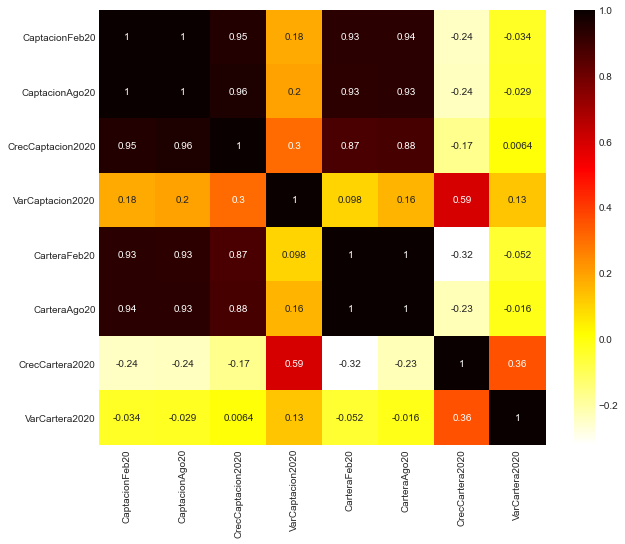

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(Total_Banca.corr(), annot=True,  cmap = 'hot_r');

De aqui solo podemos detectar que hay una correlación mayor a 0.5 entre el crecimiento de la cartera con la variación de captación 
y que la captación tanto de febrero como de agosto tienen alta correlación con la cartera de esos mismos periodos

Con esto concluimos el impacto por institución, ahora veamos el impacto que hay por estado y municipios para poder relacionarlo con las variables de covid

In [74]:
#Construcción de tabla agrupada por Estado
Estado_captacion= captacion.groupby(["cve_estado","Estado","cve_periodo","Fecha"],as_index=False).sum()
Estado_captacion["Transaccionales"]=round(Estado_captacion["Transaccionales"]/1000000000,2)
Estado_captacion["Nomina"]=round(Estado_captacion["Nomina"]/1000000000,2)
Estado_captacion["Plazo"]=round(Estado_captacion["Plazo"]/1000000000,2)
Estado_captacion["Total"]=round(Estado_captacion["Total"]/1000000000,2)
Estado_captacion["Fecha"] = pd.to_datetime(Estado_captacion["Fecha"])
Estado_captacion.head()

,cve_estado,Estado,cve_periodo,Fecha,ID,cve_institucion,cve_municipio,Año,Mes,Nomina,Transaccionales,Plazo,Total
0,1,AGUASCALIENTES,201612,2016-12-31,14742764,1842950,46178,92736,552,3.80,30.34,23.30,57.43
1,1,AGUASCALIENTES,201701,2017-01-31,14436363,1842950,46178,92782,46,3.67,32.13,25.79,61.59
2,1,AGUASCALIENTES,201702,2017-02-28,14743547,1923142,48180,96816,96,3.64,23.93,24.76,52.33
3,1,AGUASCALIENTES,201703,2017-03-31,14417386,1923142,48180,96816,144,3.80,24.49,25.39,53.68
4,1,AGUASCALIENTES,201704,2017-04-30,14089766,1923142,48180,96816,192,3.89,25.35,23.39,52.62


In [75]:
# Data frame para tener la variación que hay por estado 
Total_captacion_Estado = Estado_captacion.pivot_table(values='Total', index=['cve_estado','Estado'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Total_captacion_Estado= Total_captacion_Estado.reset_index().rename_axis(None, axis=1)
Total_captacion_Estado=Total_captacion_Estado[['cve_estado','Estado',202002,202008]]
Total_captacion_Estado=Total_captacion_Estado.rename(columns={202002:'CaptacionFeb20', 202008: 'CaptacionAgo20'})
Total_captacion_Estado['CrecCaptacion2020']=Total_captacion_Estado['CaptacionAgo20']-Total_captacion_Estado['CaptacionFeb20']
Total_captacion_Estado['VarCaptacion2020']=((Total_captacion_Estado['CaptacionAgo20']/Total_captacion_Estado['CaptacionFeb20'])-1)*100
Total_captacion_Estado=Total_captacion_Estado[Total_captacion_Estado['Estado']!='MIGRACION']
Total_captacion_Estado_R=Total_captacion_Estado.sort_values(by='CaptacionFeb20', ascending=False).reset_index().drop(columns=['index'])
Total_captacion_Estado_C=Total_captacion_Estado.sort_values(by='CrecCaptacion2020', ascending=False).reset_index().drop(columns=['index'])
Total_captacion_Estado_V=Total_captacion_Estado.sort_values(by='VarCaptacion2020', ascending=False).reset_index().drop(columns=['index'])
Total_captacion_Estado.head()

,cve_estado,Estado,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020
0,1,AGUASCALIENTES,64.59,68.78,4.19,6.487072
1,2,BAJA CALIFORNIA NORTE,135.49,155.41,19.92,14.702192
2,3,BAJA CALIFORNIA SUR,34.23,36.30,2.07,6.047327
3,4,CAMPECHE,22.13,24.14,2.01,9.082693
4,5,COAHUILA,114.04,120.27,6.23,5.462995


Vamos a generar una gráfica que muestre la concentración por estado de la captación

Text(0.5, 1.0, 'Ranking Captacion')

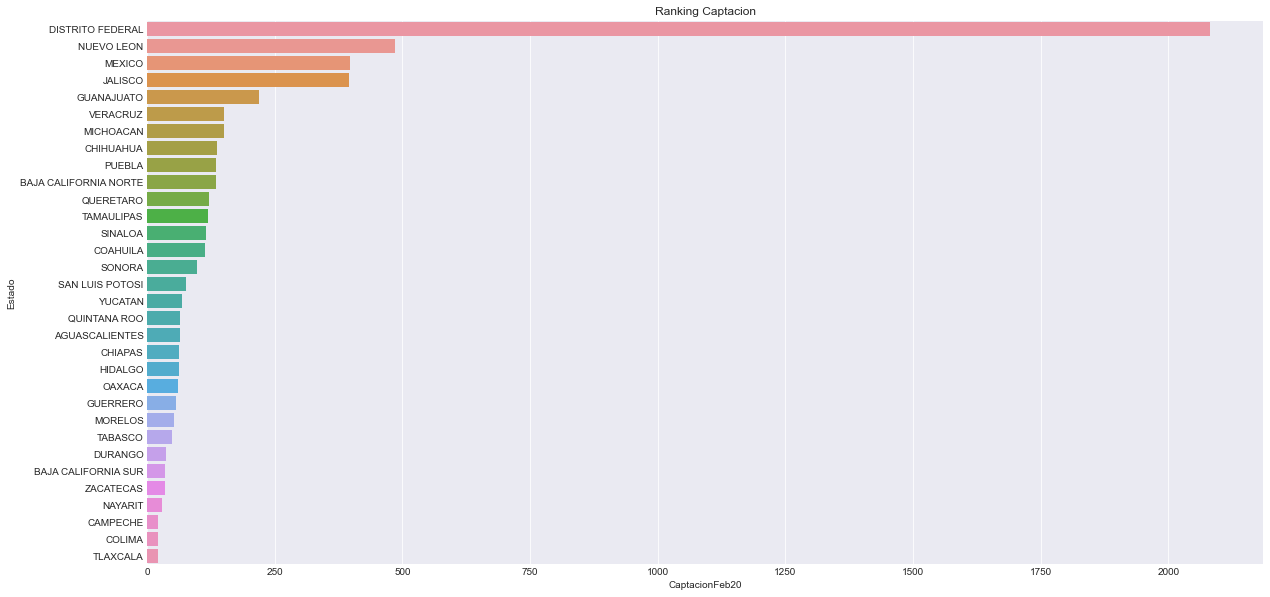

In [76]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=Total_captacion_Estado_R['CaptacionFeb20'], y=Total_captacion_Estado_R['Estado'])
ax.set_title('Ranking Captacion')

Podemos notar que un solo estado tiene muy alta la concentración del saldo y muy pocos tienen una alta concentración

Text(0.5, 1.0, 'Ranking crecimiento Captacion')

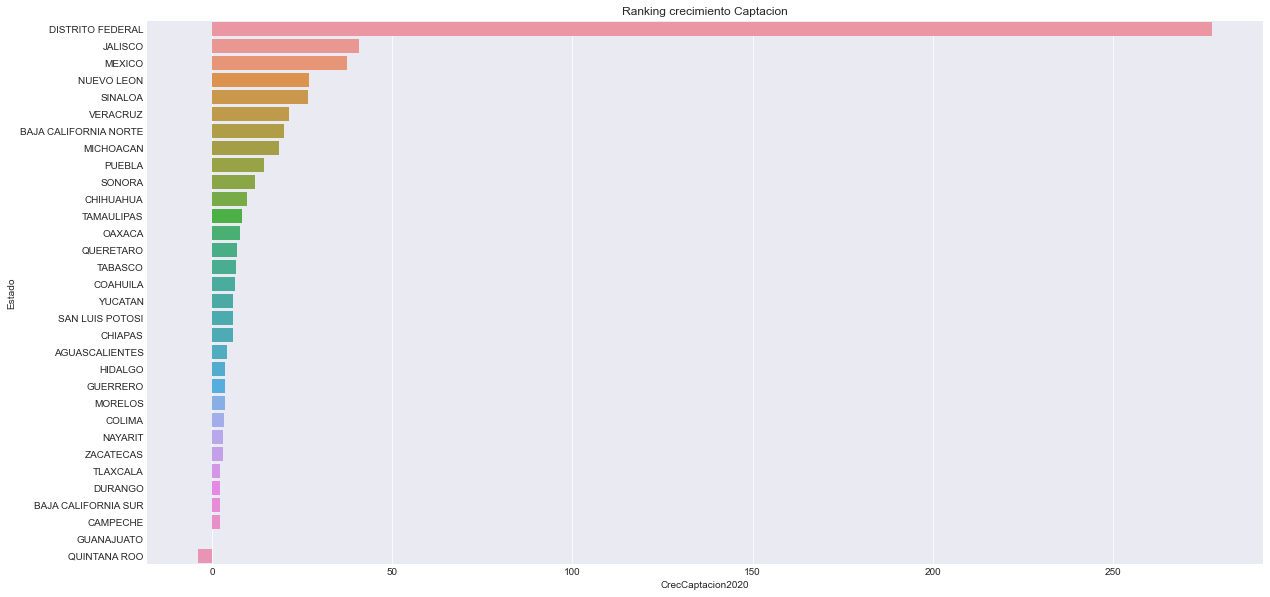

In [222]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=Total_captacion_Estado_C['CrecCaptacion2020'], y=Total_captacion_Estado_C['Estado'])
ax.set_title('Ranking crecimiento Captacion')


Se observa que practicamente todos los estados tuvieron crecimiento. pero solo 2 tuvieron una caida por covid, que son Guanajuato y Quintana Roo, esto se va mostrar de manera más visual cuando se hagan las gráficas de R

Ya vimos que paso por estado en captación ahora veamos lo que pasa con la cartera

In [79]:
#Codigo para generar Tabla de la cartera por estado
Estado_cartera= cartera.groupby(["cve_estado","Estado","cve_periodo","Fecha"],as_index=False).sum()
Estado_cartera["Automotriz"]=round(Estado_cartera["Automotriz"]/1000000000,2)
Estado_cartera["Nomina"]=round(Estado_cartera["Nomina"]/1000000000,2)
Estado_cartera["Consumo"]=round(Estado_cartera["Consumo"]/1000000000,2)
Estado_cartera["Cartera"]=round(Estado_cartera["Cartera"]/1000000000,2)
Estado_cartera["Fecha"] = pd.to_datetime(Estado_cartera["Fecha"])
Estado_cartera.head()

,cve_estado,Estado,cve_periodo,Fecha,ID,cve_municipio,cve_institucion,Automotriz,Consumo,Nomina,Cartera
0,1,AGUASCALIENTES,201602,2016-02-29,80394439,180048,7174036,0.90,1.13,1.95,3.99
1,1,AGUASCALIENTES,201604,2016-04-30,86629533,183076,7294433,0.92,1.13,2.01,4.07
2,1,AGUASCALIENTES,201606,2016-06-30,92522468,185082,7374424,0.94,1.18,2.08,4.20
3,1,AGUASCALIENTES,201608,2016-08-31,98003565,186090,7414468,0.97,1.20,2.15,4.32
4,1,AGUASCALIENTES,201610,2016-10-31,104135064,188093,7494891,1.01,1.23,2.20,4.44


In [115]:
#Codigo para ver los cambios que hay en la cartera
Total_cartera_Estado = Estado_cartera.pivot_table(values='Cartera', index=['cve_estado','Estado'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Total_cartera_Estado= Total_cartera_Estado.reset_index().rename_axis(None, axis=1)
Total_cartera_Estado=Total_cartera_Estado[['cve_estado','Estado',202002,202008]]
Total_cartera_Estado=Total_cartera_Estado.rename(columns={202002:'CarteraFeb20', 202008: 'CarteraAgo20'})
Total_cartera_Estado['CrecCartera2020']=Total_cartera_Estado['CarteraAgo20']-Total_cartera_Estado['CarteraFeb20']
Total_cartera_Estado['VarCartera2020']=((Total_cartera_Estado['CarteraAgo20']/Total_cartera_Estado['CarteraFeb20'])-1)*100
Total_cartera_Estado_R=Total_cartera_Estado.sort_values(by='CarteraFeb20', ascending=False).reset_index().drop(columns=['index'])
Total_cartera_Estado_C=Total_cartera_Estado.sort_values(by='CrecCartera2020', ascending=False).reset_index().drop(columns=['index'])
Total_cartera_Estado_V=Total_cartera_Estado.sort_values(by='VarCartera2020', ascending=False).reset_index().drop(columns=['index'])
Total_cartera_Estado.head()

,cve_estado,Estado,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020
0,1,AGUASCALIENTES,6.84,6.53,-0.31,-4.532164
1,2,BAJA CALIFORNIA NORTE,17.99,16.69,-1.30,-7.226237
2,3,BAJA CALIFORNIA SUR,4.74,4.67,-0.07,-1.476793
3,4,CAMPECHE,4.74,4.36,-0.38,-8.016878
4,5,COAHUILA,16.95,15.55,-1.40,-8.259587


Generamos la gráfica por concentración de la cartera 

Text(0.5, 1.0, 'Ranking Cartera')

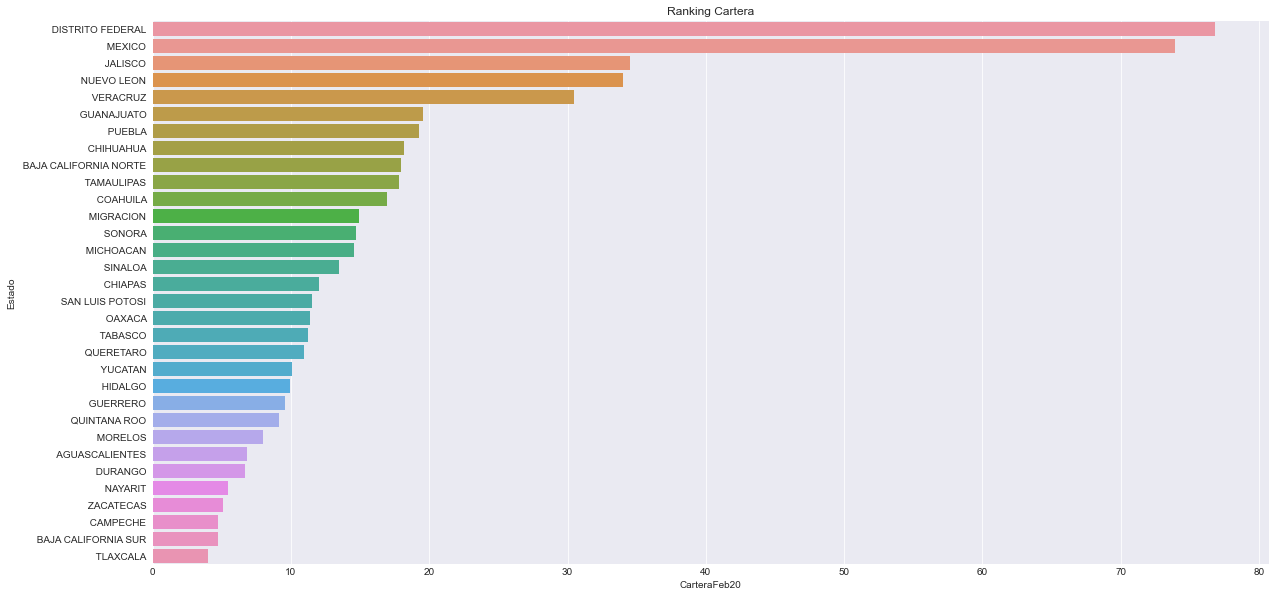

In [81]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=Total_cartera_Estado_R.drop(Total_cartera_Estado_R.index[32])['CarteraFeb20'], y=Total_cartera_Estado_R.drop(Total_cartera_Estado_R.index[32])['Estado'])
ax.set_title('Ranking Cartera')

Similar a captación, la cartera esta muy concentrada en ciertos estados, pero ya no es tan marcada la diferencia del primer estado vs el segundo, tambien podemos notar que el top 6 de captación esta en el top 6 de cartera, lo cual nos va a servir más adelante

Ahora veamos la caida que hubo en cartera por estado

Text(0.5, 1.0, 'Ranking crecimiento Cartera')

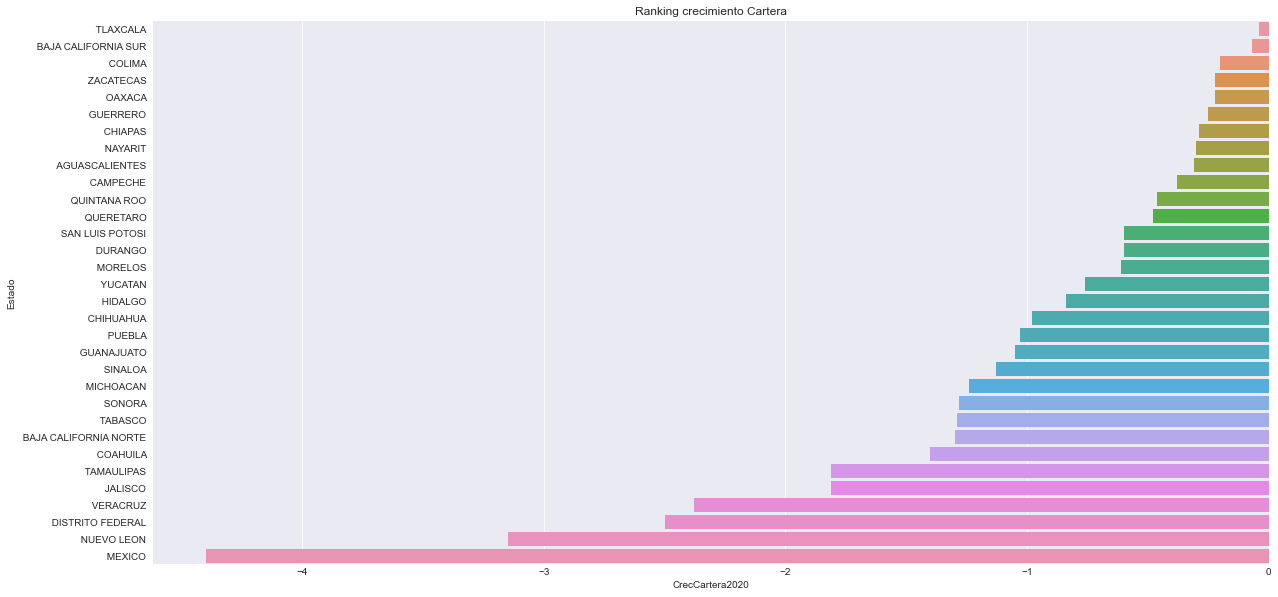

In [65]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=Total_cartera_Estado_C.drop(Total_cartera_Estado_C.index[0])['CrecCartera2020'], y=Total_cartera_Estado_C.drop(Total_cartera_Estado_C.index[0])['Estado'])
ax.set_title('Ranking crecimiento Cartera')

Vemos que en todos los estados se tuvo una caida de cartera, por lo que podemos inferir que los estados más afectados por covid son Guanajuato y Quintana Roo ya que son los unicos estados que perdieron tanto en captación como en cartera

Viendo la vista de cartera los que tenía la mayor parte de esta fueron los que tuvieron la mayor caída

Esto se va completar un poco con los mapas que se harian en R, pero esto se va generar más adelante

Ahora vamos a buscar la relación por municipio para conocer que impacto hubo en general a este nivel

In [87]:
#Codigo para hacer el Data frame de crecimeinto pero a nivel de municipio
Municipio_captacion= captacion.groupby(["cve_municipio","Municipio","cve_estado","Estado","cve_periodo","Fecha"],as_index=False).sum()
Municipio_captacion=Municipio_captacion[Municipio_captacion['cve_municipio'] != 99999]
Municipio_captacion["Transaccionales"]=round(Municipio_captacion["Transaccionales"]/1000000,2)
Municipio_captacion["Nomina"]=round(Municipio_captacion["Nomina"]/1000000,2)
Municipio_captacion["Plazo"]=round(Municipio_captacion["Plazo"]/1000000,2)
Municipio_captacion["Total"]=round(Municipio_captacion["Total"]/1000000,2)
Municipio_captacion["Fecha"] = pd.to_datetime(Municipio_captacion["Fecha"])
Municipio_captacion = Municipio_captacion.pivot_table(values='Total', index=['cve_municipio','Municipio','cve_estado','Estado'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Municipio_captacion=Municipio_captacion.reset_index().rename_axis(None, axis=1)
Municipio_captacion=Municipio_captacion[['cve_municipio','Municipio','cve_estado','Estado',202002,202008]]
Municipio_captacion=Municipio_captacion.rename(columns={202002:'CaptacionFeb20', 202008: 'CaptacionAgo20'})
Municipio_captacion['CrecCaptacion2020']=Municipio_captacion['CaptacionAgo20']-Municipio_captacion['CaptacionFeb20']
Municipio_captacion['VarCaptacion2020']=((Municipio_captacion['CaptacionAgo20']/Municipio_captacion['CaptacionFeb20'])-1)*100
Municipio_captacion=Municipio_captacion.fillna(0)
Municipio_captacion.head()


,cve_municipio,Municipio,cve_estado,Estado,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020
0,1001,AGUASCALIENTES,1,AGUASCALIENTES,61261.62,65114.11,3852.49,6.288587
1,1002,ASIENTOS,1,AGUASCALIENTES,0.58,0.50,-0.08,-13.793103
2,1003,CALVILLO,1,AGUASCALIENTES,1101.80,1273.56,171.76,15.589036
3,1004,COSIO,1,AGUASCALIENTES,0.08,0.09,0.01,12.500000
4,1005,JESUS MARIA,1,AGUASCALIENTES,264.53,248.10,-16.43,-6.211016


Ya tenemos un df con la información por municipio pero veamos un poco de la descripción de este data frame

In [88]:
print(f"Mediana de captación por municipio ${Municipio_captacion['CaptacionFeb20'].median()*1000000} pesos")
print(f"Mediana del crecimiento de captación por municipio ${round(Municipio_captacion['CrecCaptacion2020'].median()*1000000,0)} pesos")
print(f"Mediana de la variación de captación por municipio {round(Municipio_captacion['VarCaptacion2020'].median(),0)}%")

Mediana de captación por municipio $140000.0 pesos
Mediana del crecimiento de captación por municipio $20000.0 pesos
Mediana de la variación de captación por municipio 8.0%


Text(0.5, 1.0, 'Captación Febrero 2020')

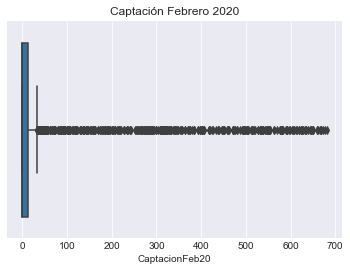

In [90]:
iqr = Municipio_captacion['CaptacionFeb20'].quantile(0.75) - Municipio_captacion['CaptacionFeb20'].quantile(0.25)
filtro_inferior =  Municipio_captacion['CaptacionFeb20'] >  Municipio_captacion['CaptacionFeb20'].quantile(0.25) - (iqr * 1.5)
filtro_superior =  Municipio_captacion['CaptacionFeb20'] <  Municipio_captacion['CaptacionFeb20'].quantile(0.75) + (iqr * 1.5)
df =  Municipio_captacion['CaptacionFeb20']
df_filtrado = df[filtro_inferior & filtro_superior]
ax=sns.boxplot(x=df_filtrado);
ax.set_title('Captación Febrero 2020')

Vemos que la gran mayoría de los municipios no tienen captación y que aun quitando los valores atípicos, 
sigue habiendo muchos datos que esta arriba de la media

Habria que ver si lo mismo pasa con la información de la cartera una ves que generemos su data frame

In [92]:
# Datda frame d elos crecimientos de los municipios por caertera
Municipio_cartera= cartera.groupby(["cve_municipio","Municipio","cve_estado","Estado","cve_periodo","Fecha"],as_index=False).sum()
Municipio_cartera=Municipio_cartera[Municipio_cartera['cve_municipio'] != 99999]
Municipio_cartera["Consumo"]=round(Municipio_cartera["Consumo"]/1000000,2)
Municipio_cartera["Nomina"]=round(Municipio_cartera["Nomina"]/1000000,2)
Municipio_cartera["Automotriz"]=round(Municipio_cartera["Automotriz"]/1000000,2)
Municipio_cartera["Cartera"]=round(Municipio_cartera["Cartera"]/1000000,2)
Municipio_cartera["Fecha"] = pd.to_datetime(Municipio_cartera["Fecha"])
Municipio_cartera = Municipio_cartera.pivot_table(values='Cartera', index=['cve_municipio','Municipio','cve_estado','Estado'], columns=['cve_periodo'], aggfunc='sum',fill_value=0)
Municipio_cartera=Municipio_cartera.reset_index().rename_axis(None, axis=1)
Municipio_cartera=Municipio_cartera[['cve_municipio','Municipio','cve_estado','Estado',202002,202008]]
Municipio_cartera=Municipio_cartera.rename(columns={202002:'CarteraFeb20', 202008: 'CarteraAgo20'})
Municipio_cartera['CrecCartera2020']=Municipio_cartera['CarteraAgo20']-Municipio_cartera['CarteraFeb20']
Municipio_cartera['VarCartera2020']=((Municipio_cartera['CarteraAgo20']/Municipio_cartera['CarteraFeb20'])-1)*100
Municipio_cartera=Municipio_cartera.fillna(0)
Municipio_cartera.head()

,cve_municipio,Municipio,cve_estado,Estado,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020
0,1001,Aguascalientes,1,AGUASCALIENTES,5444.55,5193.59,-250.96,-4.609380
1,1002,Asientos,1,AGUASCALIENTES,84.46,83.01,-1.45,-1.716789
2,1003,Calvillo,1,AGUASCALIENTES,112.28,105.72,-6.56,-5.842537
3,1004,Cosio,1,AGUASCALIENTES,44.09,40.28,-3.81,-8.641415
4,1005,Jesus Maria (Aguascalientes),1,AGUASCALIENTES,583.94,554.91,-29.03,-4.971401


In [93]:
print(f"Mediana de cartera por municipio ${Municipio_cartera['CarteraFeb20'].median()*1000000} pesos")
print(f"Mediana del crecimiento de cartera por municipio ${round(Municipio_cartera['CrecCartera2020'].median()*1000000,0)} pesos")
print(f"Mediana de la variación de cartera por municipio {round(Municipio_cartera['VarCartera2020'].median(),0)}%")

Mediana de cartera por municipio $18595000.0 pesos
Mediana del crecimiento de cartera por municipio $-690000.0 pesos
Mediana de la variación de cartera por municipio -5.0%


Por cartera nos damos cuenta que en principio, el impacto por municipio fue casi nulo, lo que nos hace pensar que los extremos fueron los 
más afectados en la caida de cartera

Text(0.5, 1.0, 'Cartera Febrero 2020')

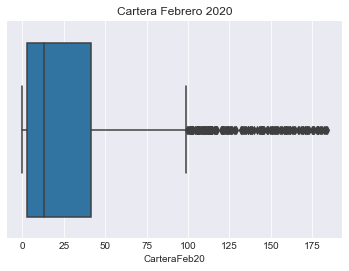

In [94]:
iqr = Municipio_cartera['CarteraFeb20'].quantile(0.75) - Municipio_cartera['CarteraFeb20'].quantile(0.25)
filtro_inferior =  Municipio_cartera['CarteraFeb20'] >  Municipio_cartera['CarteraFeb20'].quantile(0.25) - (iqr * 1.5)
filtro_superior =  Municipio_cartera['CarteraFeb20'] <  Municipio_cartera['CarteraFeb20'].quantile(0.75) + (iqr * 1.5)
df =  Municipio_cartera['CarteraFeb20']
df_filtrado = df[filtro_inferior & filtro_superior]
ax=sns.boxplot(x=df_filtrado)
ax.set_title('Cartera Febrero 2020')

En este caso no hay tantos valores atípicos como con la captación, pero sigue habiendo varios municipios que estan por arriba de la media

Ahora seria cuestión de unir los dos data frames que estan a nivel municipio para que se le incorpore los datos de Covid

In [96]:
#Creción de data frame con informaicón de captación y cartera
Total_Municipio=pd.merge(Municipio_captacion , Municipio_cartera.drop(columns=['Estado','Municipio','cve_estado']), how='outer', left_on='cve_municipio', right_on = 'cve_municipio' ).fillna(0)
Total_MunicipioE=Total_Municipio.dropna().drop(columns=['Estado','Municipio','cve_estado'])
Total_MunicipioE=Total_MunicipioE.set_index('cve_municipio')
Total_MunicipioE.head()

,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020
cve_municipio,,,,,,,,
1001,61261.62,65114.11,3852.49,6.288587,5444.55,5193.59,-250.96,-4.609380
1002,0.58,0.50,-0.08,-13.793103,84.46,83.01,-1.45,-1.716789
1003,1101.80,1273.56,171.76,15.589036,112.28,105.72,-6.56,-5.842537
1004,0.08,0.09,0.01,12.500000,44.09,40.28,-3.81,-8.641415
1005,264.53,248.10,-16.43,-6.211016,583.94,554.91,-29.03,-4.971401


Text(0.5, 1.0, 'matriz de correlación')

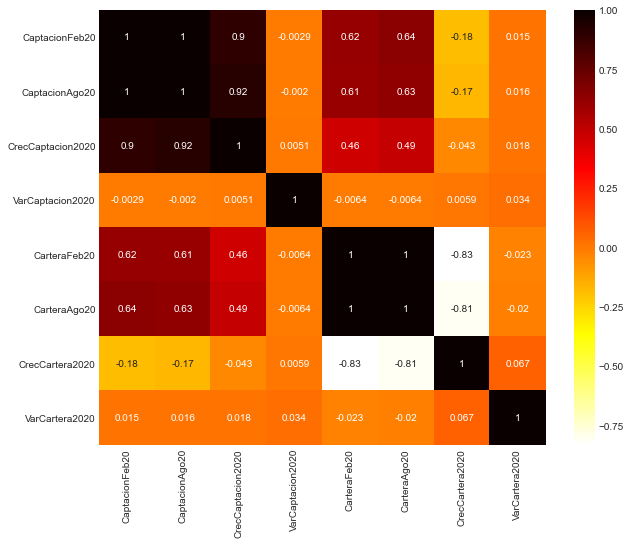

In [803]:
plt.figure(figsize=(10, 8))
sns.heatmap(Total_MunicipioE.corr(), annot=True,  cmap = 'hot_r');
ax.set_title('Matriz de correlación')

Al sacar una matriz de correlación vemos que los crecimeintos de captación de cartera no tienen corrrelación

Ahora vamos a incorporar dos data frames que vienen con la información de covid, uno es la que tiene la informaicón del Conacyt y el otro seria la información que se publica de datos abiertos, esta última base se trabajo conun código de R "casos_covid_municipio" 

In [98]:
#Lectura de la tabla covid
covid = pd.read_csv('Covid_municipio_conacyt.csv')
covid.head()

,cve_ent,poblacion,nombre,defuncionesAgo20,defuncionesTotales20,confirmadosAgo20,confirmadosTotales20
0,16046,15290,Juarez,2,5,52,85
1,16047,22358,Jungapeo,2,4,20,30
2,16048,5862,Lagunillas,0,3,5,31
3,16049,18769,Madero,3,4,33,48
4,5035,744247,Torreon,339,740,5095,9314


In [106]:
covid_mun = pd.read_csv('20200904_COVID_MUNICIPAL.csv')
covid_mun=covid_mun[covid_mun['Periodo']==202008]
covid_mun.head()

,cve_munedo,Periodo,confirmados,negativos,sospechoso,defuncion,activos,Activos_periodo,Muerte_acumuladas,Confirmados_acumulados
7,1001,202008,1288,2714,188,83,246,430,364,4472
14,1002,202008,17,49,3,0,4,4,6,89
21,1003,202008,17,46,0,2,4,5,5,142
29,1004,202008,17,18,0,1,1,4,1,84
38,1005,202008,63,200,36,0,10,19,7,204


In [104]:
# Data frame que incorpora los datos del Conacyt
Total_Municipi_covid=pd.merge(Total_Municipio , covid, how='outer', left_on='cve_municipio', right_on = 'cve_ent' ).fillna(0)
Total_Municipi_covid=Total_Municipi_covid.drop(columns=['cve_ent','nombre'])
Total_Municipi_covidF=Total_Municipi_covid.drop(columns=['Municipio','cve_estado','Estado'])
Total_Municipi_covidF=Total_Municipi_covidF.set_index('cve_municipio')
Total_Municipi_covidF['Pob_covid_cienmil']=Total_Municipi_covidF['confirmadosTotales20']/Total_Municipi_covidF['poblacion']*100000
Total_Municipi_covidF['Pob_enfermos_cienmil']=Total_Municipi_covidF['defuncionesTotales20']/Total_Municipi_covidF['confirmadosTotales20']*100000
Total_Municipi_covidF['Pob_covid_cienmilAgo']=Total_Municipi_covidF['confirmadosAgo20']/Total_Municipi_covidF['poblacion']*100000
Total_Municipi_covidF['Pob_enfermos_cienmilAgo']=Total_Municipi_covidF['defuncionesAgo20']/Total_Municipi_covidF['confirmadosAgo20']*100000
Total_Municipi_covidF=Total_Municipi_covidF.fillna(0)
Total_Municipi_covidF.head()

,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020,poblacion,defuncionesAgo20,defuncionesTotales20,confirmadosAgo20,confirmadosTotales20,Pob_covid_cienmil,Pob_enfermos_cienmil,Pob_covid_cienmilAgo,Pob_enfermos_cienmilAgo
cve_municipio,,,,,,,,,,,,,,,,,
1001.0,61261.62,65114.11,3852.49,6.288587,5444.55,5193.59,-250.96,-4.609380,961977.0,388.0,854.0,4568.0,8969.0,932.350773,9521.685807,474.855428,8493.870403
1002.0,0.58,0.50,-0.08,-13.793103,84.46,83.01,-1.45,-1.716789,50864.0,6.0,10.0,89.0,165.0,324.394464,6060.606061,174.976408,6741.573034
1003.0,1101.80,1273.56,171.76,15.589036,112.28,105.72,-6.56,-5.842537,60760.0,5.0,10.0,143.0,307.0,505.266623,3257.328990,235.352205,3496.503497
1004.0,0.08,0.09,0.01,12.500000,44.09,40.28,-3.81,-8.641415,16918.0,1.0,3.0,84.0,98.0,579.264688,3061.224490,496.512590,1190.476190
1005.0,264.53,248.10,-16.43,-6.211016,583.94,554.91,-29.03,-4.971401,130184.0,7.0,29.0,212.0,391.0,300.344128,7416.879795,162.846433,3301.886792


In [145]:
#Data frame que incorpora los datos del covid que se trabajaron en R
Total_Municipi_covid2=pd.merge(Total_Municipi_covid , covid_mun, how='outer', left_on='cve_municipio', right_on = 'cve_munedo' ).drop(columns=['Periodo','cve_munedo']).fillna(0)
Total_Municipi_covid2['Activos_100_mil_hab']=Total_Municipi_covid2['Activos_periodo']/ Total_Municipi_covid2['poblacion']*100000
Total_Municipi_covid2['Casos_100_mil_hab']=Total_Municipi_covid2['Confirmados_acumulados']/ Total_Municipi_covid2['poblacion']*100000
Total_Municipi_covid2['Muertes_100_mil_casos']=Total_Municipi_covid2['Muerte_acumuladas']/ Total_Municipi_covid2['Confirmados_acumulados']*100000
Total_Municipi_covid2.loc[Total_Municipi_covid2.poblacion == 0 ,'Activos_100_mil_hab' ]=0
Total_Municipi_covid2.loc[Total_Municipi_covid2.poblacion == 0 ,'Casos_100_mil_hab' ]=0
Total_Municipi_covid2=Total_Municipi_covid2.set_index('cve_municipio').fillna(0)
Total_Municipi_covid3F=Total_Municipi_covid2.drop(columns=['Municipio','cve_estado','Estado'])
Total_Municipi_covid3F.head()

,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020,poblacion,defuncionesAgo20,...,negativos,sospechoso,defuncion,activos,Activos_periodo,Muerte_acumuladas,Confirmados_acumulados,Activos_100_mil_hab,Casos_100_mil_hab,Muertes_100_mil_casos
cve_municipio,,,,,,,,,,,,,,,,,,,,,
1001.0,61261.62,65114.11,3852.49,6.288587,5444.55,5193.59,-250.96,-4.609380,961977.0,388.0,...,2714.0,188.0,83.0,246.0,430.0,364.0,4472.0,44.699613,464.875979,8139.534884
1002.0,0.58,0.50,-0.08,-13.793103,84.46,83.01,-1.45,-1.716789,50864.0,6.0,...,49.0,3.0,0.0,4.0,4.0,6.0,89.0,7.864108,174.976408,6741.573034
1003.0,1101.80,1273.56,171.76,15.589036,112.28,105.72,-6.56,-5.842537,60760.0,5.0,...,46.0,0.0,2.0,4.0,5.0,5.0,142.0,8.229098,233.706386,3521.126761
1004.0,0.08,0.09,0.01,12.500000,44.09,40.28,-3.81,-8.641415,16918.0,1.0,...,18.0,0.0,1.0,1.0,4.0,1.0,84.0,23.643457,496.512590,1190.476190
1005.0,264.53,248.10,-16.43,-6.211016,583.94,554.91,-29.03,-4.971401,130184.0,7.0,...,200.0,36.0,0.0,10.0,19.0,7.0,204.0,14.594727,156.701284,3431.372549


Ya que tenemos un data frame con la información por municipio, vamos generar un matriz de correlación con las variables de covid

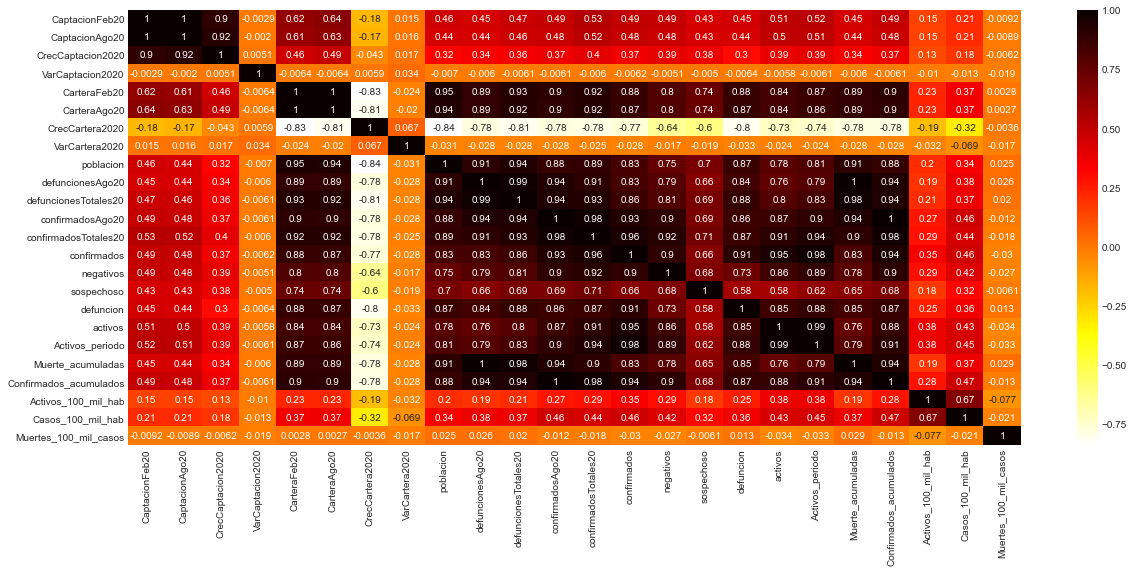

In [112]:
#matriz de correlación a nivel municipal
plt.figure(figsize=(20, 8))
sns.heatmap(Total_Municipi_covid3F.corr(), annot=True,  cmap = 'hot_r');

En primera instancia vemos que no hay correlación con la cartera y captación con las variables de covid, pero cuando vimos la información por estado, se detecto la mayor parte de la cartera y captación estan en muy pocos estados por lo que vamos considerar solo los municipios de estos, que serían el Distrito federal, el Estado de México, Jalisco, Nuevo León, Veracruz y Guanajuato

In [667]:
#Crwación de data frame con los principales estados
Total_Municipi_covid_top_est=Total_Municipi_covid2[Total_Municipi_covid2.cve_estado.isin([9,15,19,14,30,11])]
Total_Municipi_covid_top_est=Total_Municipi_covid_top_est.drop(columns=['Municipio','cve_estado','Estado'])
Total_Municipi_covid_top_est.head()

,CaptacionFeb20,CaptacionAgo20,CrecCaptacion2020,VarCaptacion2020,CarteraFeb20,CarteraAgo20,CrecCartera2020,VarCartera2020,poblacion,defuncionesAgo20,...,negativos,sospechoso,defuncion,activos,Activos_periodo,Muerte_acumuladas,Confirmados_acumulados,Activos_100_mil_hab,Casos_100_mil_hab,Muertes_100_mil_casos
cve_municipio,,,,,,,,,,,,,,,,,,,,,
9002.0,28349.77,37750.45,9400.68,33.159634,3784.89,3546.90,-237.99,-6.287897,408441.0,679.0,...,1742.0,363.0,55.0,182.0,399.0,584.0,5796.0,97.688528,1419.054404,10075.914424
9003.0,69026.49,68778.53,-247.96,-0.359224,6531.59,6098.92,-432.67,-6.624268,621952.0,550.0,...,2658.0,357.0,53.0,179.0,420.0,525.0,7059.0,67.529327,1134.975046,7437.314067
9004.0,56586.57,79620.47,23033.90,40.705595,2605.11,2401.92,-203.19,-7.799671,199809.0,165.0,...,1062.0,559.0,17.0,135.0,283.0,150.0,2871.0,141.635262,1436.872213,5224.660397
9005.0,48567.53,51257.05,2689.52,5.537692,8323.71,7834.81,-488.90,-5.873583,1176967.0,1737.0,...,5913.0,752.0,109.0,406.0,841.0,1502.0,12268.0,71.454850,1042.340185,12243.234431
9006.0,14257.82,14719.77,461.95,3.239976,3050.55,2905.83,-144.72,-4.744063,393821.0,557.0,...,1779.0,297.0,51.0,129.0,266.0,498.0,4671.0,67.543376,1186.071845,10661.528581


Veamos como cambia la matriz de correlación con este último filtro

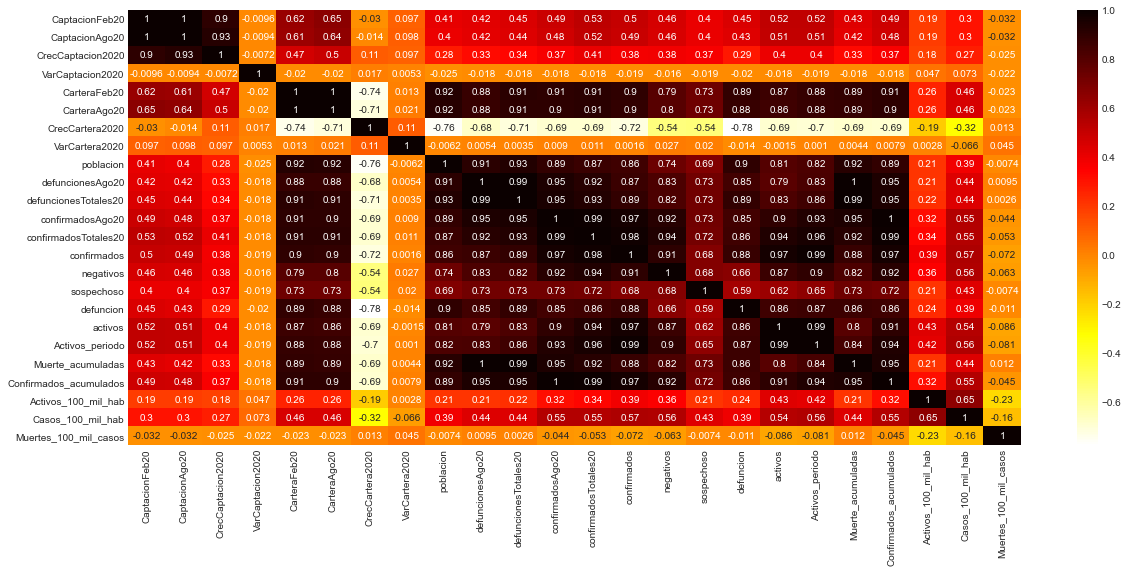

In [668]:
#matriz de correlación a nivel municipal
Total_Municipi_covid_top_est = Total_Municipi_covid_top_est[Total_Municipi_covid_top_est['CarteraFeb20']>0]
plt.figure(figsize=(20, 8))
sns.heatmap(Total_Municipi_covid_top_est.corr(), annot=True,  cmap = 'hot_r');

Con esto vemos que el aumento de la captación  no se habla con los impactos de Covid, sin embargo el crecimiento de la cartera si muestra una correlación negativa en varias variables , principalmente en los valores absolutos, lo que nos habla que mientras más casos de enfermos o activos menor seria el crecimiento de la cartera, esto se va autilizar para hacer los modelos predictivos

Antes de continuar con la generación del modelo vamos a exportar los dataframe ya con la información del covid para poder hacer gráficas de mapas en R

In [130]:
#Data frame con la información de los municipios y covid
Total_Municipi_covid2.to_csv('Banca_mun.csv')

Ahora vamos a generar la información que se utilizaria para hacer los mapas pero de los estados 

In [132]:
#Data frame con la información de los estados y el covid
Total_Estado_covid=Total_Municipi_covid2.groupby(["cve_estado","Estado"])[["CrecCartera2020","CrecCaptacion2020","poblacion","Activos_periodo","Muerte_acumuladas","Confirmados_acumulados"]].sum()
Total_Estado_covid=Total_Estado_covid.reset_index()
Total_Estado_covid['Activos_100_mil_hab']=Total_Estado_covid['Activos_periodo']/ Total_Estado_covid['poblacion']*100000
Total_Estado_covid['Casos_100_mil_hab']=Total_Estado_covid['Confirmados_acumulados']/ Total_Estado_covid['poblacion']*100000
Total_Estado_covid['Muertes_100_mil_casos']=Total_Estado_covid['Muerte_acumuladas']/ Total_Estado_covid['Confirmados_acumulados']*100000
Total_Estado_covid=Total_Estado_covid[Total_Estado_covid['Estado']!=0]
Total_Estado_covid=Total_Estado_covid.set_index('cve_estado')
Total_Estado_covid.head()

,Estado,CrecCartera2020,CrecCaptacion2020,poblacion,Activos_periodo,Muerte_acumuladas,Confirmados_acumulados,Activos_100_mil_hab,Casos_100_mil_hab,Muertes_100_mil_casos
cve_estado,,,,,,,,,,
1.0,AGUASCALIENTES,-310.32,4187.13,1434635.0,497.0,415.0,5833.0,34.642958,406.584253,7114.692268
2.0,BAJA CALIFORNIA NORTE,-1304.31,19921.09,3634868.0,637.0,3238.0,17151.0,17.524708,471.846570,18879.365635
3.0,BAJA CALIFORNIA SUR,-73.43,2066.17,804708.0,960.0,370.0,7872.0,119.297932,978.243040,4700.203252
4.0,CAMPECHE,-378.27,2009.27,1000617.0,188.0,762.0,5634.0,18.788408,563.052597,13525.026624
5.0,COAHUILA,-1404.97,6231.88,3218720.0,1963.0,1450.0,22209.0,60.986976,689.994781,6528.884686


De igual forma exportamos esta base para que R pueda leer la información y poder hacer mapas por estado

In [133]:
Total_Estado_covid.to_csv('Banca_est.csv')

Ahora vamos a tratar de hacer un modelo para determinar el crecimiento de la cartera en función de la variables que tenemos, de tal forma que podamos predecir si un municipio va a incrementar su cartera o bajarla, adicional haremos una clasificación de k-medias para los municipios que tuvieron muertes de covid

Instalamnos las librerias que nos ayudarían a poder hacer generar los modelos 

In [744]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

Primero vamos limpiar el dataframe para clasificar los municipios que crecen o no y que se van a utilizar en el modelo de regresión logistico

In [709]:
Total_Municipi_covid_crec = Total_Municipi_covid3F[['CrecCartera2020','CarteraFeb20','poblacion','defuncion',"Activos_periodo"]]
Total_Municipi_covid_crec = Total_Municipi_covid_crec[Total_Municipi_covid_crec['CarteraFeb20']>0]
Total_Municipi_covid_crec['CrecCartera2020'] = Total_Municipi_covid_crec['CrecCartera2020'].apply(lambda x: 1 if x > 0 else 0)
#Total_Municipi_covid_top_est
#Total_Municipi_covid3F

In [710]:
X = Total_Municipi_covid_crec.drop(columns=['CrecCartera2020'])
y = Total_Municipi_covid_crec['CrecCartera2020']

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=1000000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.7836734693877551

Al sacar el score del modelo podemos ver que es un número cercano a 1 pero si tiene una diferencia de casi 0.22, pero con la matriz de confusión podremos saber en donde esta acertando y fallando el modelo

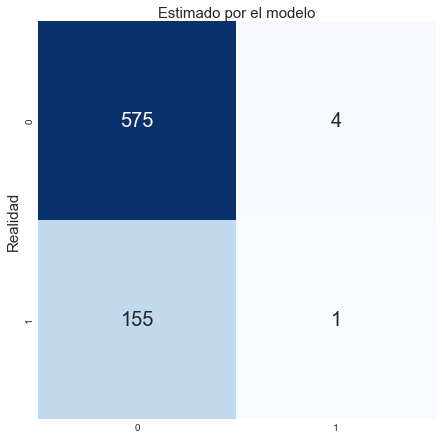

In [719]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [720]:
tn, fp, fn, tp = cnf_matrix.ravel()
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.2
Exactitud: 0.7836734693877551
Sensibilidad: 0.00641025641025641
Especificidad: 0.9930915371329879


Esto no habla que nuestro modelo si puede predecir en su mayoria los municipios que tendrían un caída de la cartera, pero cuando queremos saber los que pueden crecer es donde nos falla debido a que practicamente no acierta con ninguno

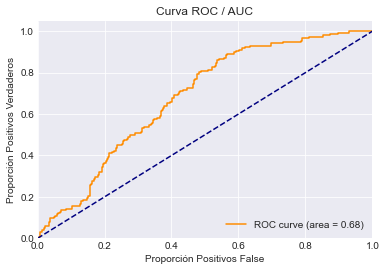

In [722]:
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Con la curva de Roc podemos ver que el área bajo la curva de este es de 0.68, lo que nos habla de un modelo regular, como se había mencionado si predice los municipios que van a caer en cartera pero no los que van a subir

Por último vamos a tratar de predecir el comportamiento de la cartera en función de las muertes de Covid, debido a que tienen una correlación mayor a 0.7

Text(0.5, 1.0, 'Crecimientos de la cartera vs defunciones')

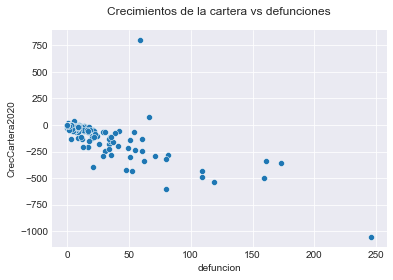

In [755]:
CrecC = Total_Municipi_covid_top_est['CrecCartera2020']
Def = Total_Municipi_covid_top_est[]
ax = sns.scatterplot(x= Def , y =  CrecC)
ax.set_title('Crecimientos de la cartera vs defunciones', pad=15)

A primera vista se ve que si tuviera cierta correlación, pero tenemos algunos datos que si tienen un comportamiento muy alejado al de resto

Text(0.5, 1.0, 'Crecimientos de la cartera vs defunciones')

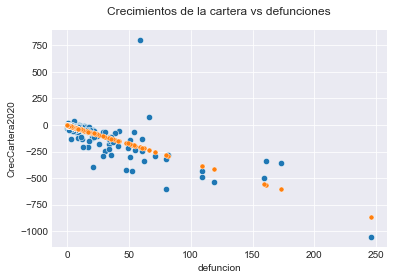

In [754]:
lr = LinearRegression()
lr.fit(Def.to_frame(),   CrecC)
y_predict = lr.predict(Def.to_frame())
ax = sns.scatterplot(x=Def, y=CrecC, s=40);
sns.scatterplot(x=Def, y=y_predict, s=25);
ax.set_title('Crecimientos de la cartera vs defunciones', pad=15)

Cuando vemos la predicción vs el modelo podemos decir que si pasa en varios puntos, pero para decidir si es efectivo o no habria que calcular su R cuadrada

In [740]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} * x + {intercept}')
print(f'R2: {lr.score(Def.to_frame(), CrecC)}')

y = -3.4933334856978724 * x + -3.317738116879365
R2: 0.6045948023098464


Con esto podemos decir que la regreción es aceptable pero no perfecta ya que si bien es mayor a 0.5 esta aun alejada del 1, por último vamos usar el modelo de k-means

Subdiviendo nuestra región en 6 subregiones para ver como se comporta la media de las muertes de covid vs el crecimeinto de cartera

In [762]:
k_means.fit(Total_Municipi_covid_top_est[['defuncion','CrecCartera2020']])
centers = k_means.cluster_centers_
clasificaciones = k_means.predict(Total_Municipi_covid_top_est[['defuncion','CrecCartera2020']])

In [763]:
k_means = KMeans(n_clusters=6, max_iter=100000)

c:\users\saulo\documents\miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\saulo\documents\miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


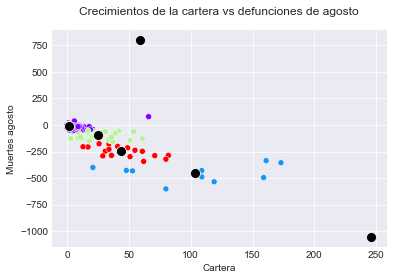

In [764]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Crecimientos de la cartera vs defunciones de agosto', pad=15)
ax.set_xlabel('Cartera')
ax.set_ylabel('Muertes agosto')
sns.scatterplot(Total_Municipi_covid_top_est['defuncion'],Total_Municipi_covid_top_est['CrecCartera2020'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');
ax.get_legend().remove()

Aqui podemos ver las 6 regiones que dividio, esto nos puede servir para aislar los comportamientos de cada una de esta subregiones, que nos podría servir para hacer predicciones más precisas

Conclusiones

La cartera cae principalmente en créditos de consumo y la captación por cuentas transaccionales, ambos casos en los meses de pandemia

Banco Azteca y Banorte se han beneficiado en este periodo ya que se destacan tanto en cartera y captación

El quiebre de Famsa la hace como la institución más afectada, pero sin considerarla sería
 Ci Banco

Guanajuato y Quintana Roo se han visto afectados por el periodo de Covid, ya que bajaron su captación y cartera, este último posiblemente por su dependencia al turístico

La captación no esta muy relacionada con los variables de covid

se puede estimar el crecimiento de cartera con el impacto de covid, pero  son modelos sin tan buenas estimaciones,  por lo deben de haber otras variables que ayuden a  describir mejor el comportamiento como la actividad económica o el índice de desempleo